#  <h1 align="center"><font size="7">Covid Dataset</font></h1>

## Data Cleaning

### Import libraries

Let's first load required libraries:

In [1]:
# We Will Import the Libraries that we need.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

In [2]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


Let's download the dataset


Context:


Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.


The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

content:


The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.


- sex: 1 for female and 2 for male.

- age: of the patient.


- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.


- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.


- pneumonia: whether the patient already have air sacs inflammation or not.


- pregnancy: whether the patient is pregnant or not.


- diabetes: whether the patient has diabetes or not.


- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.


- asthma: whether the patient has asthma or not.


- inmsupr: whether the patient is immunosuppressed or not.


- hypertension: whether the patient has hypertension or not.


- cardiovascular: whether the patient has heart or blood vessels related disease.


- renal chronic: whether the patient has chronic renal disease or not.


- other disease: whether the patient has other disease or not.


- obesity: whether the patient is obese or not.


- tobacco: whether the patient is a tobacco user.


- usmr: Indicates whether the patient treated medical units of the first, second or third level.


- medical unit: type of institution of the National Health System that provided the care.


- intubed: whether the patient was connected to the ventilator.


- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.


- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

### Upload The Data

In [3]:
# We will import the file from the Exil (spreadsheet).
dat = pd.read_csv("Covid Data.csv")
dat

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


### look at the data

In [4]:
# Take a look at the head of the data.
dat.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [5]:
# Take a look at the tail of the data.
dat.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [6]:
# Take a look at the form (shape) of the data (Dimensions of Dataset).
dat.shape

(1048575, 21)

In [7]:
# Look at the columns names.
dat.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [8]:
dat.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570     True
1048571    False
1048572    False
1048573     True
1048574    False
Length: 1048575, dtype: bool

In [9]:
# We are looking for duplicate rows.
dat.duplicated().sum()

812049

In [10]:
dat.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

**Use the .info() method to find out how many entries there are.**

In [11]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [12]:
# We are looking for types of the columns in the data.
dat.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [13]:
# To know and see the number of components or the number of sample of each column in this data.
dat.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

### Data Tuning and Initialization

#### Remove tha Duplicated Rows

We removed the repeating rows, so as not to affect the model build to work with the data, but kept one row of them.

In [14]:
gt = dat.drop_duplicates(keep='last')

In [15]:
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [16]:
# Take a look at the form (shape) of the data (Dimensions of Dataset)  after tuning.
gt.shape

(236526, 21)

#### Tuning For the CLASIFFICATION_FINAL Column

In [17]:
gt.CLASIFFICATION_FINAL.value_counts()

3    106712
7     77075
6     33629
5     10900
1      4730
2      1846
4      1634
Name: CLASIFFICATION_FINAL, dtype: int64

In [18]:
# covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 
# 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
gt["CLASIFFICATION_FINAL"] = [2 if each>=4 else 1 for each in gt.CLASIFFICATION_FINAL]

In [19]:
gt.CLASIFFICATION_FINAL.value_counts()

2    123238
1    113288
Name: CLASIFFICATION_FINAL, dtype: int64

In [20]:
gt["CLASIFFICATION_FINAL"] = [0 if each>=2 else 1 for each in gt.CLASIFFICATION_FINAL]

In [21]:
gt.CLASIFFICATION_FINAL.value_counts()

0    123238
1    113288
Name: CLASIFFICATION_FINAL, dtype: int64

#### Define missing data

##### For the DATE_DIED Column

If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [22]:
gt.DATE_DIED.value_counts()

9999-99-99    160561
07/07/2020       984
06/07/2020       980
13/07/2020       970
16/06/2020       960
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [23]:
#convert date_died to died or not, 2 for alive 1 for dead

gt["DEATH"] = [0 if each=="9999-99-99" else 1 for each in gt.DATE_DIED]

In [24]:
#drop DATE_DIED column
gt.drop(columns="DATE_DIED", inplace=True)

In [25]:
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [26]:
gt.DEATH.value_counts()

0    160561
1     75965
Name: DEATH, dtype: int64

##### For the AGE Column

In [27]:
gt.AGE.value_counts()

56     5047
60     4909
59     4878
57     4854
55     4802
       ... 
118       2
115       2
111       1
121       1
113       1
Name: AGE, Length: 121, dtype: int64

In [28]:
#Create a column for ptients >60 years and <60 years.
gt['AGE'] = [0 if each < 54 else 1 for each in gt['AGE']]

In [29]:
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [30]:
gt.AGE.value_counts()

1    120048
0    116478
Name: AGE, dtype: int64

#### Tuning in general

##### Drop All Missing Value

In [31]:
# Drop All Missing Value.
gt = gt[(gt.PNEUMONIA == 1) | (gt.PNEUMONIA == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [32]:
gt = gt[(gt.DIABETES == 1) | (gt.DIABETES == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [33]:
gt = gt[(gt.COPD == 1) | (gt.COPD == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [34]:
gt = gt[(gt.ASTHMA == 1) | (gt.ASTHMA == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [35]:
gt = gt[(gt.INMSUPR == 1) | (gt.INMSUPR == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [36]:
gt = gt[(gt.HIPERTENSION == 1) | (gt.HIPERTENSION == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [37]:
gt = gt[(gt.OTHER_DISEASE == 1) | (gt.OTHER_DISEASE == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [38]:
gt = gt[(gt.CARDIOVASCULAR == 1) | (gt.CARDIOVASCULAR == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [39]:
gt = gt[(gt.OBESITY == 1) | (gt.OBESITY == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [40]:
gt = gt[(gt.RENAL_CHRONIC == 1) | (gt.RENAL_CHRONIC == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [41]:
gt = gt[(gt.TOBACCO == 1) | (gt.TOBACCO == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


##### Drop  columns

we will Drop this columns because it have many of the data, and It will affect data quality.

In [42]:
dr = gt.copy()
dr

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [43]:
dr.ICU.value_counts()

2     113136
97     92390
1      14961
99      2168
Name: ICU, dtype: int64

In [44]:
dr.PREGNANT.value_counts()

97    122462
2      95888
1       2788
98      1517
Name: PREGNANT, dtype: int64

In [45]:
dr.INTUBED.value_counts()

2     96566
97    92390
1     31675
99     2024
Name: INTUBED, dtype: int64

In [46]:
dr.drop(['ICU','PREGNANT','INTUBED','MEDICAL_UNIT'], inplace= True, axis=1)
dr

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,2,2,2,2,1,2,2,2,2,2,1,1
1,2,2,1,1,1,2,2,2,2,1,2,2,1,1,2,0,1
2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,1
3,2,1,1,2,0,2,2,2,2,2,2,2,2,2,2,0,1
4,2,2,1,2,1,1,2,2,2,1,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2,0,2,2,2,2,2,2,2,2,2,2,0,0
1048571,1,2,2,2,0,2,2,2,2,1,2,2,2,2,2,0,0
1048572,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,0,0
1048573,2,2,1,2,0,2,2,2,2,2,2,2,2,2,2,0,0


## Data Visualization

In [47]:
# Matrix form for correlation data
drrr= dr.corr()
drrr

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
USMER,1.000000,-0.008824,-0.145449,0.096091,-0.038105,0.022649,-0.003357,-0.014800,-0.013965,0.020905,-0.008277,-0.011675,-0.025650,0.021727,-0.023061,-0.037550,-0.119641
SEX,-0.008824,1.000000,0.096967,-0.087167,0.030920,0.017621,0.017354,0.076663,0.033102,0.031090,0.043374,0.001741,0.046825,-0.001482,-0.102453,0.058657,0.129270
PATIENT_TYPE,-0.145449,0.096967,1.000000,-0.491464,0.230420,-0.088360,-0.003684,0.155867,0.020172,-0.059904,0.030873,0.030940,0.077468,-0.035713,0.099135,0.188348,0.463790
PNEUMONIA,0.096091,-0.087167,-0.491464,1.000000,-0.167317,0.066927,-0.007988,-0.118531,-0.036157,0.035461,-0.058972,-0.035930,-0.029784,-0.005785,-0.069429,-0.213047,-0.379923
AGE,-0.038105,0.030920,0.230420,-0.167317,1.000000,-0.195888,-0.133853,0.119805,0.041805,-0.249532,0.041298,-0.076536,0.076653,-0.032119,0.054350,0.111077,0.280500
DIABETES,0.022649,0.017621,-0.088360,0.066927,-0.195888,1.000000,0.041327,-0.053072,-0.008532,0.281099,-0.044663,0.049433,0.046631,0.129570,-0.027086,-0.052381,-0.079102
COPD,-0.003357,0.017354,-0.003684,-0.007988,-0.133853,0.041327,1.000000,0.017950,0.019842,0.073421,-0.003460,0.073469,0.004716,0.021267,0.071025,0.033273,0.023166
ASTHMA,-0.014800,0.076663,0.155867,-0.118531,0.119805,-0.053072,0.017950,1.000000,0.001570,-0.035272,-0.012628,-0.007286,0.041742,-0.035174,-0.000991,0.053977,0.135291
INMSUPR,-0.013965,0.033102,0.020172,-0.036157,0.041805,-0.008532,0.019842,0.001570,1.000000,-0.022632,0.113754,0.028285,-0.026118,0.078351,-0.014141,0.060969,0.059525
HIPERTENSION,0.020905,0.031090,-0.059904,0.035461,-0.249532,0.281099,0.073421,-0.035272,-0.022632,1.000000,-0.016476,0.130069,0.089037,0.161720,-0.020670,-0.039224,-0.059998


<AxesSubplot: >

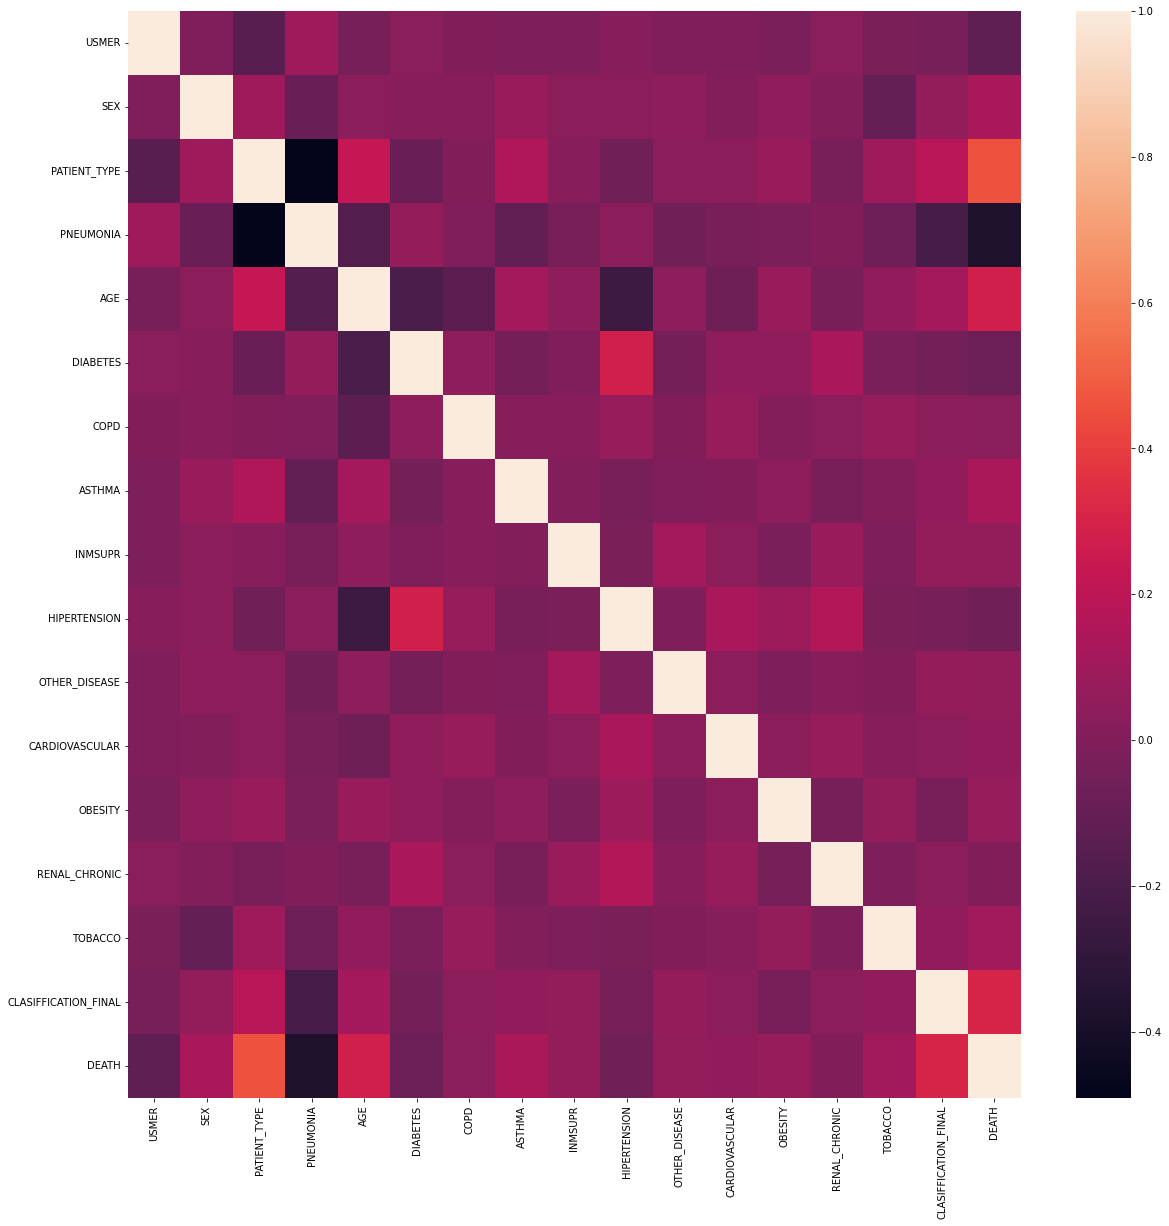

In [48]:
# We here looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr)

<AxesSubplot: >

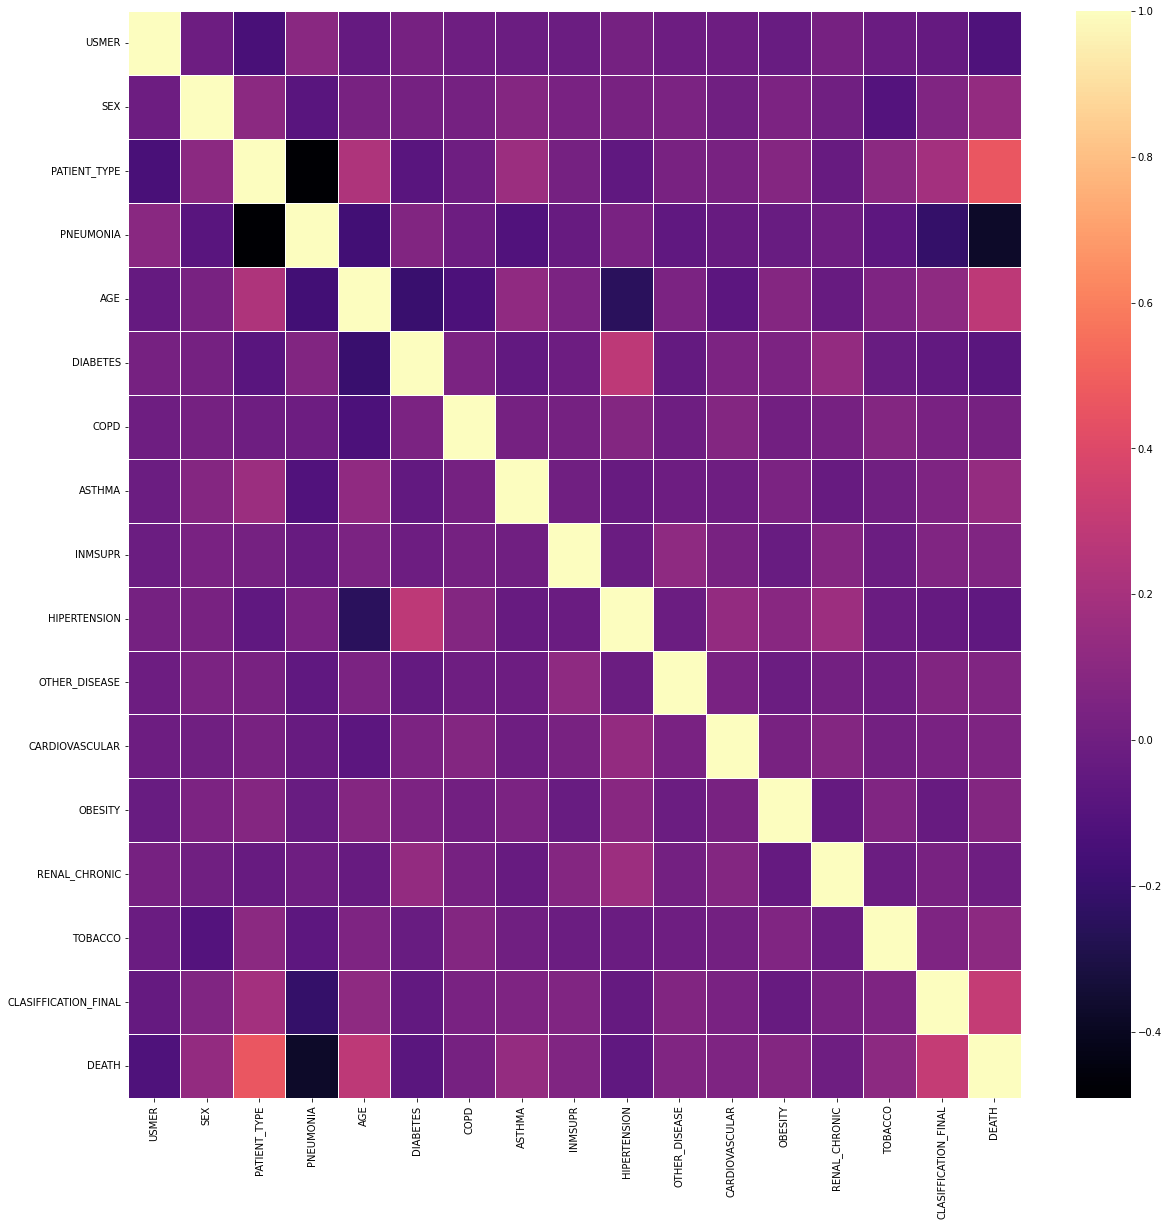

In [49]:
# Another method to looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr,cmap='magma',linecolor='white',linewidths=1)

<AxesSubplot: >

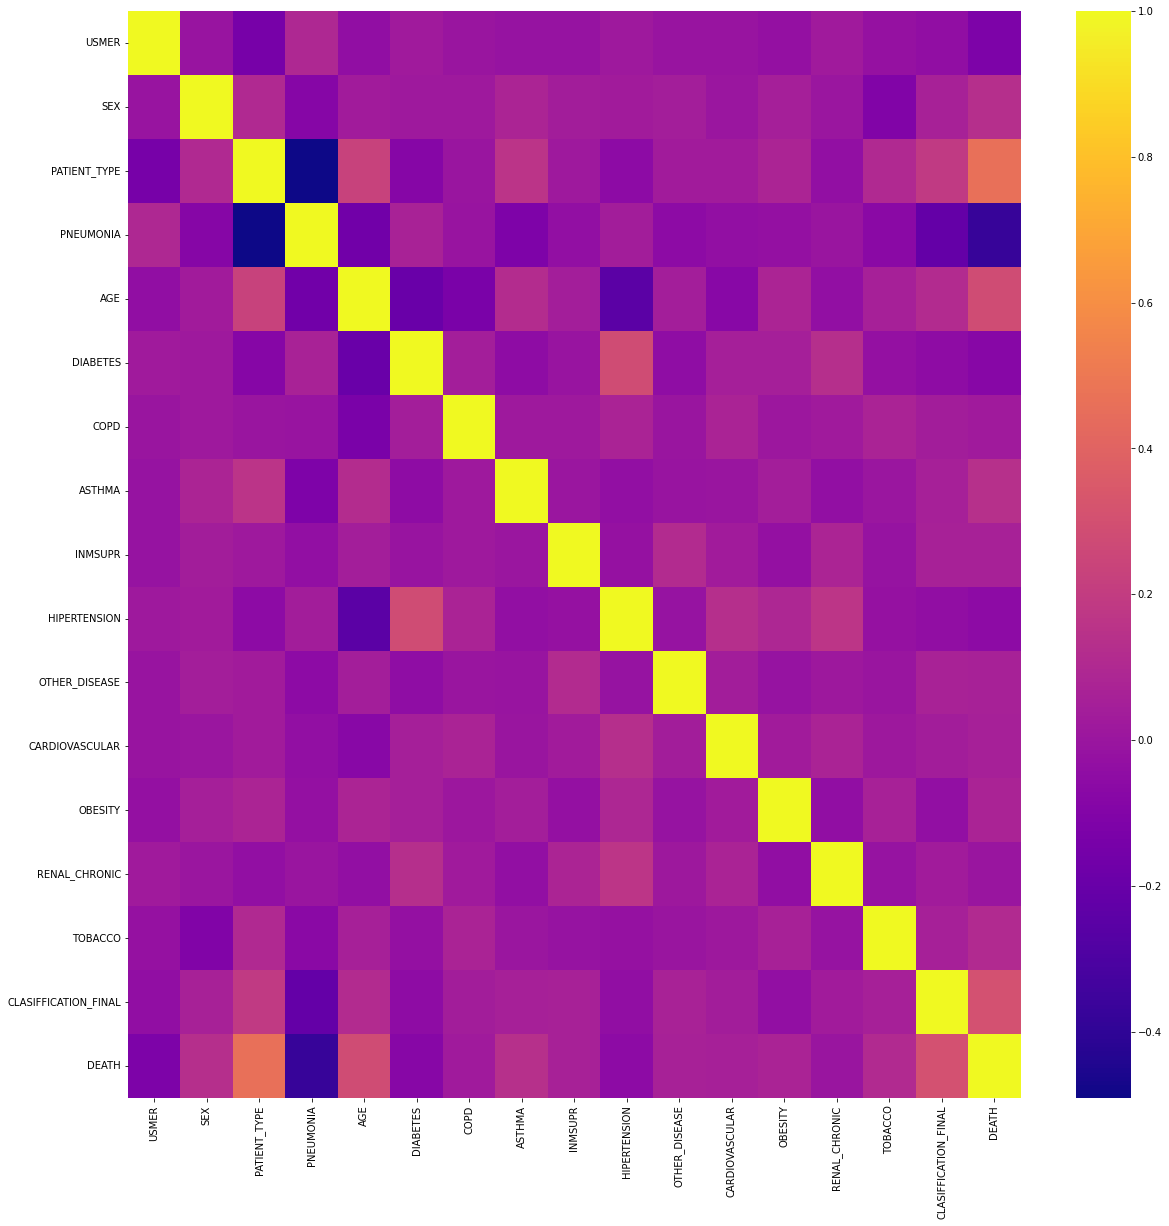

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(drrr,cmap='plasma',)

<AxesSubplot: >

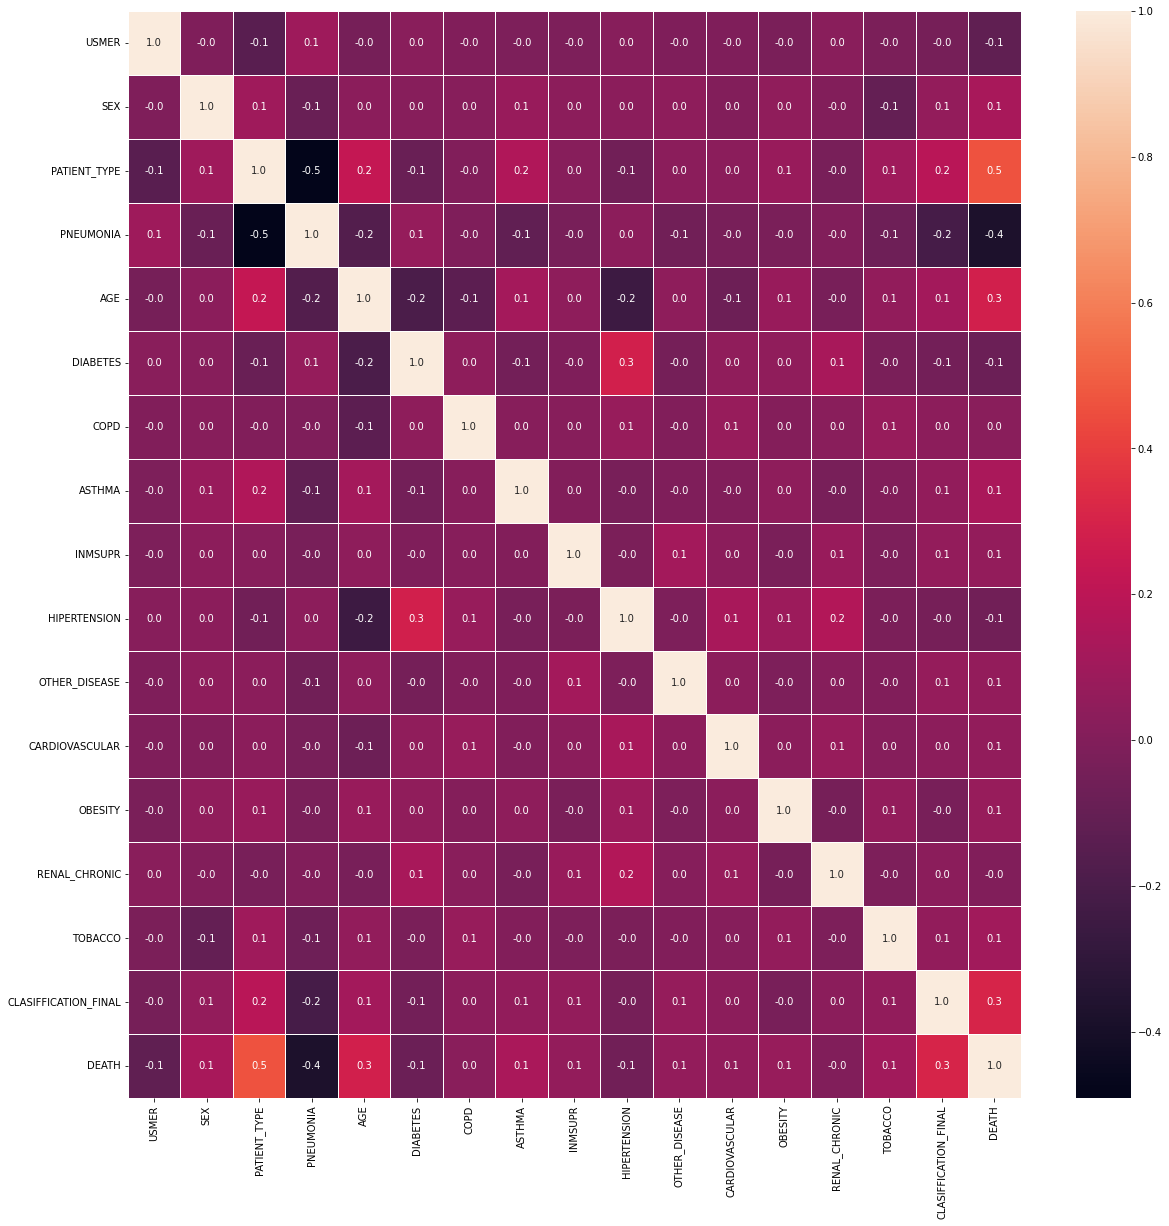

In [51]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(drrr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

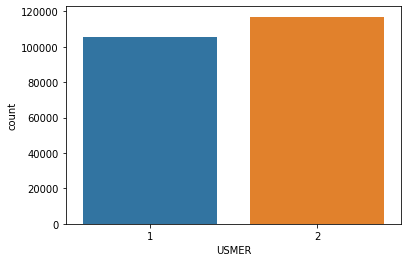

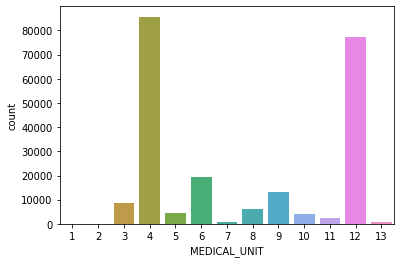

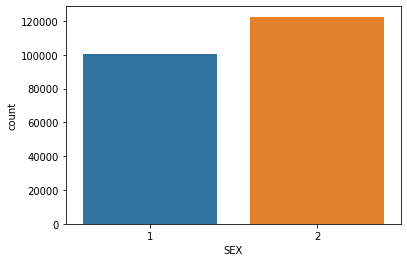

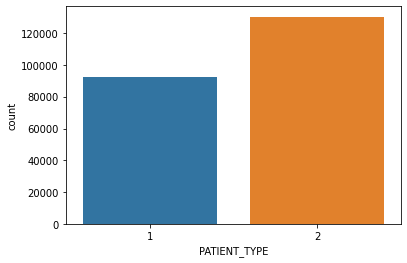

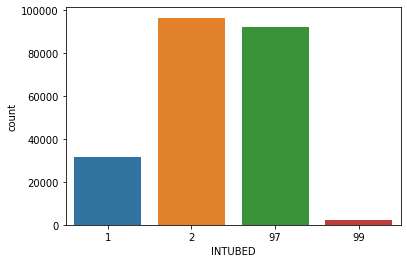

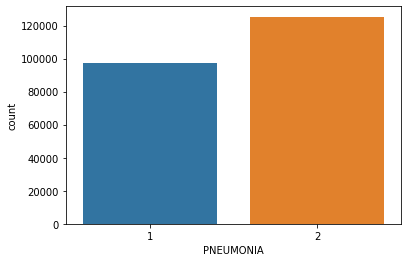

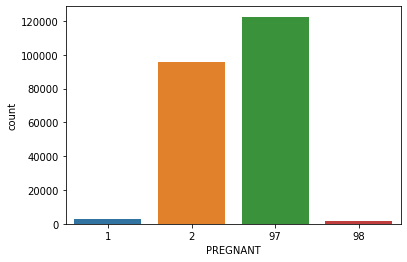

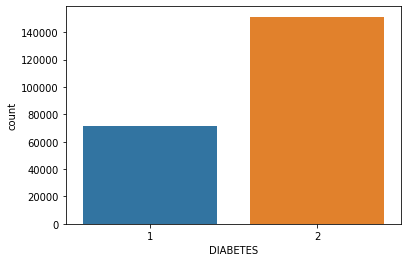

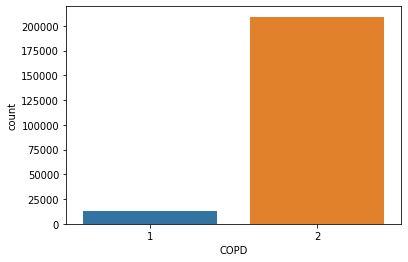

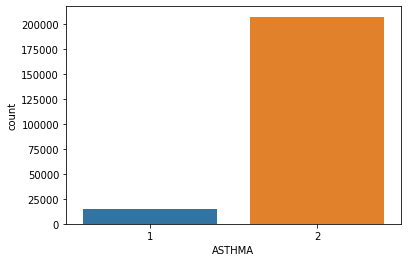

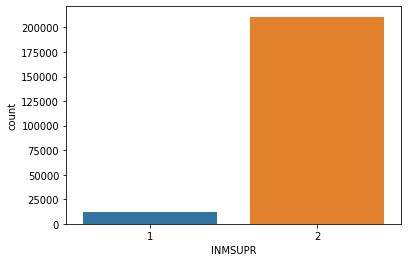

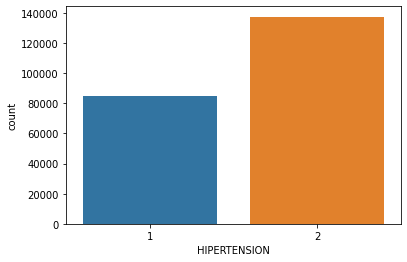

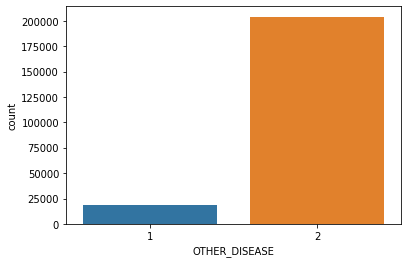

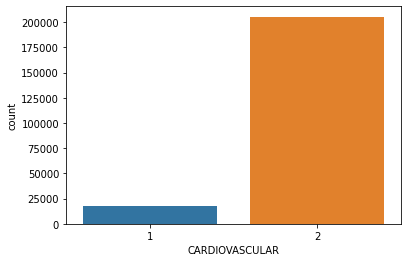

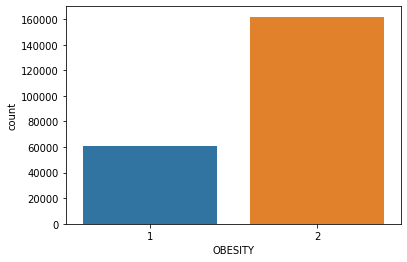

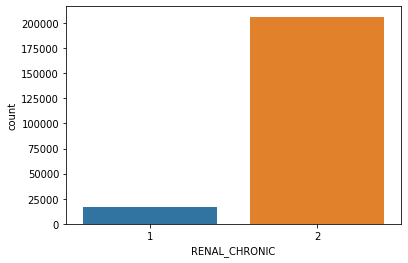

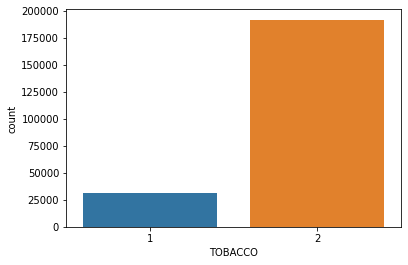

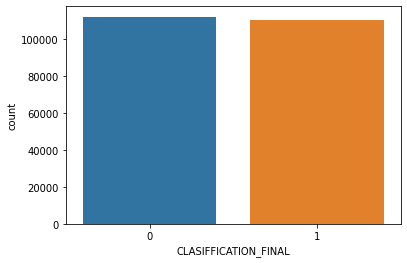

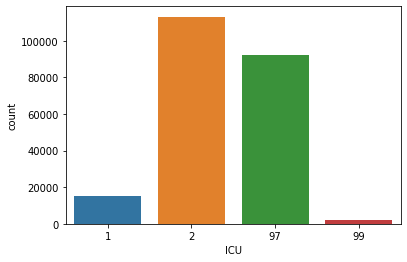

In [52]:
# Original data.
for i in gt.loc[:, ~gt.columns.isin(["DEATH", "AGE"])]:
    f = sns.countplot(x=gt[i]);
    plt.show()

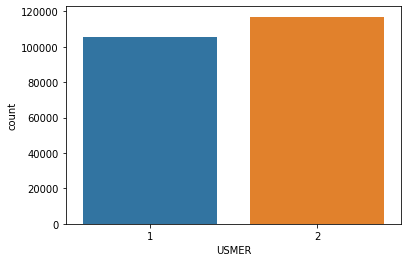

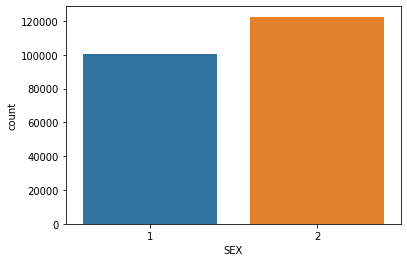

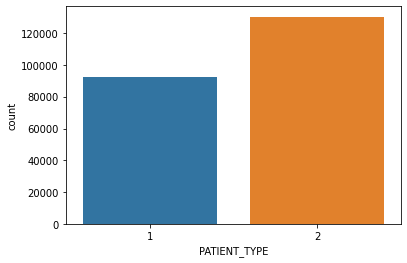

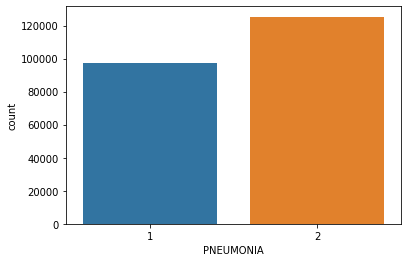

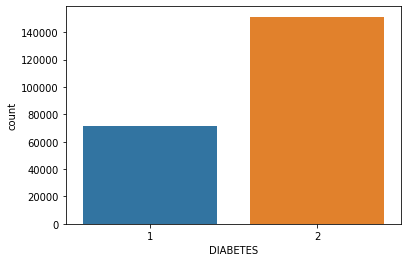

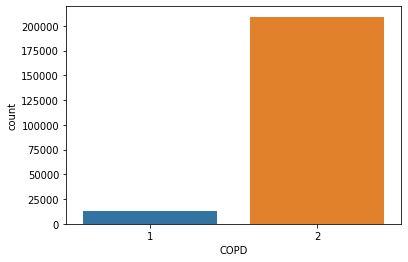

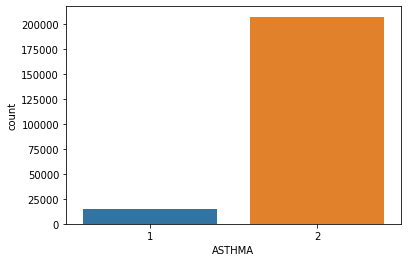

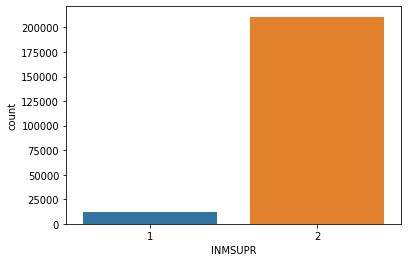

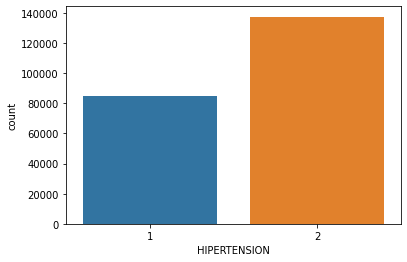

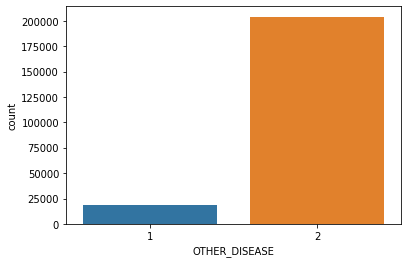

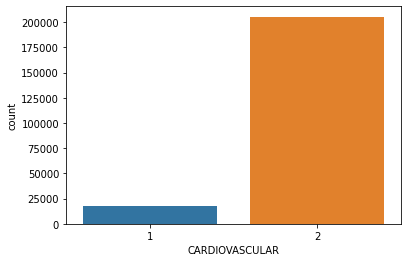

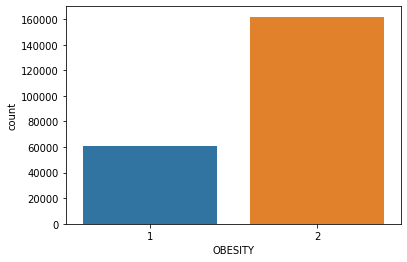

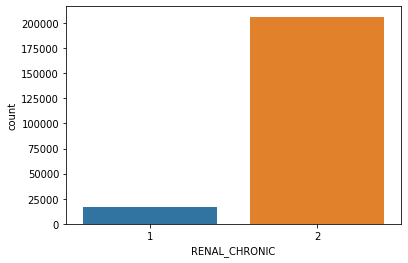

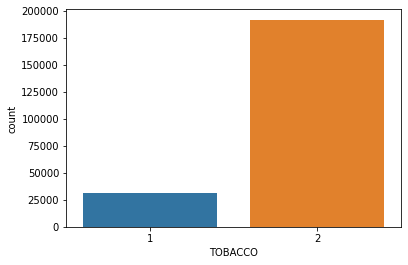

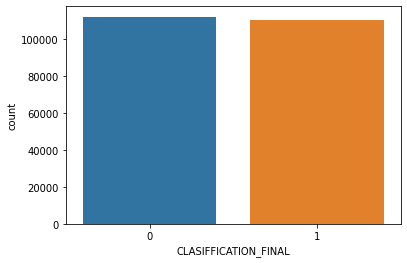

In [53]:
# After tuning.
for i in dr.loc[:, ~dr.columns.isin(["DEATH", "AGE"])]:
    f = sns.countplot(x=dr[i]);
    plt.show()

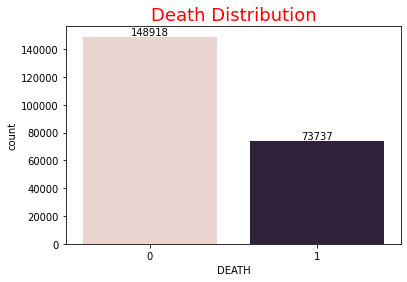

In [54]:
ax = sns.countplot(dr.DEATH,palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

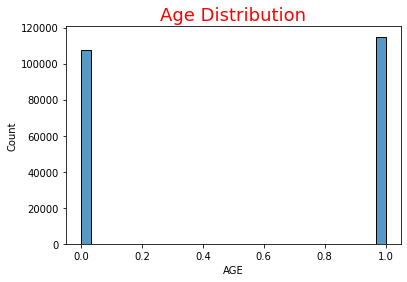

In [55]:
sns.histplot(x=dr.AGE)
plt.title("Age Distribution", color="red", fontsize=18);

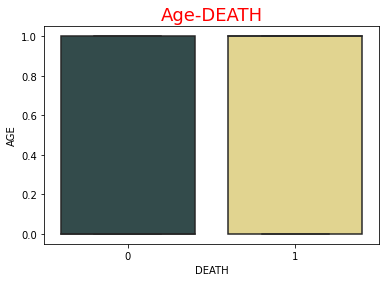

In [56]:
sns.boxplot(x="DEATH", y="AGE",data=dr,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-DEATH",fontsize=18, color="red");

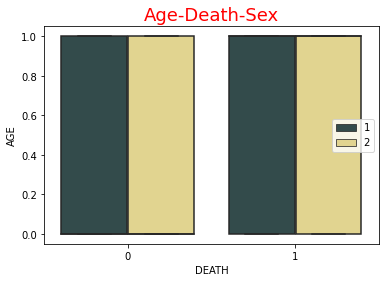

In [57]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=gt,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best");

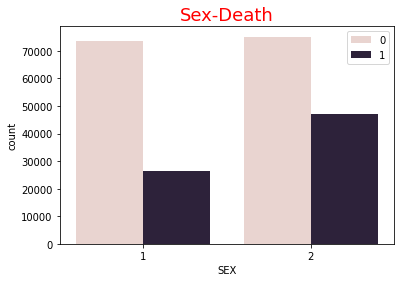

In [59]:
sns.countplot(dr.SEX,hue=dr.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Sex-Death",fontsize=18, color="red")
plt.legend(loc="best");

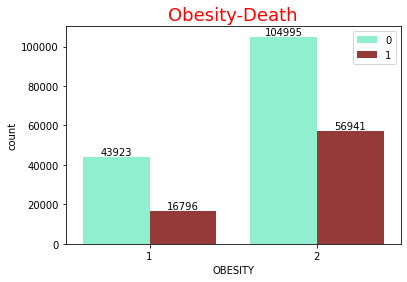

In [60]:
ax=sns.countplot(dr.OBESITY,hue=dr.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

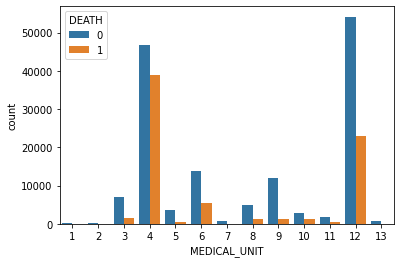

In [61]:
sns.countplot(hue=gt.DEATH, x= gt.MEDICAL_UNIT);

<Figure size 1440x1440 with 0 Axes>

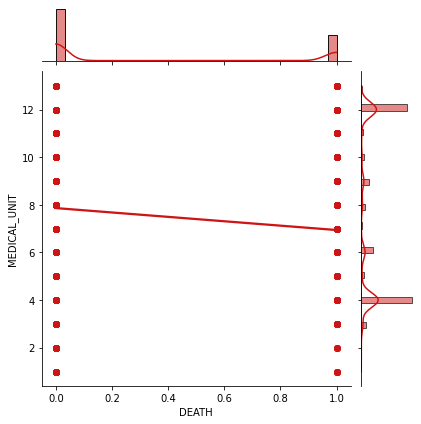

In [62]:
plt.figure(figsize=(20,20))
sns.jointplot(gt.loc[:,'DEATH'], gt.loc[:,'MEDICAL_UNIT'], kind="reg", color="#ce1414")

## Splite The Data Into Train & Test & Validation

### Define dependant & independant

In [ ]:
x_dr = dr.drop(['DEATH'],axis=1)
y_dr = dr['DEATH']

In [ ]:
x_dr

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,2,2,2,2,1,2,2,2,2,2,1
1,2,2,1,1,1,2,2,2,2,1,2,2,1,1,2,0
2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1
3,2,1,1,2,0,2,2,2,2,2,2,2,2,2,2,0
4,2,2,1,2,1,1,2,2,2,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2,0,2,2,2,2,2,2,2,2,2,2,0
1048571,1,2,2,2,0,2,2,2,2,1,2,2,2,2,2,0
1048572,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,0
1048573,2,2,1,2,0,2,2,2,2,2,2,2,2,2,2,0


### Splite the data into Train & Test

In [ ]:
drx_train, drx_test, dry_train, dry_test = train_test_split(x_dr, y_dr, test_size=0.2, random_state=42)

In [ ]:
drx_train.shape, drx_test.shape, dry_train.shape, dry_test.shape

((178124, 16), (44531, 16), (178124,), (44531,))

In [ ]:
# drx_test = pd.DataFrame(drx_test).to_csv('drx_test .csv')

In [ ]:
# dry_test = pd.DataFrame(dry_test).to_csv('dry_test .csv')

### Splite the train data into train & validation

In [ ]:
xdata_train, xdata_valid, ydata_train, ydata_valid = train_test_split(drx_train, dry_train, test_size=0.2, random_state=42)

In [ ]:
xdata_train.shape, xdata_valid.shape, ydata_train.shape, ydata_valid.shape

((142499, 16), (35625, 16), (142499,), (35625,))

In [ ]:
x_train = xdata_train.copy()

In [ ]:
y_train = ydata_train.copy()

In [ ]:
x_valid = xdata_valid.copy()

In [ ]:
y_valid = ydata_valid.copy()

## Data Preprocessing without scaling

#### Data with Tomek

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
Tomek_label = TomekLinks()

In [ ]:
X_res_lanel, y_res_lanel = Tomek_label.fit_resample(x_train, y_train)

In [ ]:
X_res_lanel.shape, y_res_lanel.shape

((142476, 16), (142476,))

#### Data with SmoteTomek

In [ ]:
smtm = SMOTETomek(random_state=42)

In [ ]:
x_ressmtm, y_ressmtm = smtm.fit_resample(x_train, y_train)

### Data with Feature Selection

#### chi

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [ ]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_valid)

In [ ]:
X_test = select_feature.transform(drx_test)

In [ ]:
ddrx_train = select_feature.transform(drx_train)

## Data Preprocessing with Normalization scaling

#### Normalization

In [ ]:
# preprocessing.
from sklearn.preprocessing import MinMaxScaler
norm_label = MinMaxScaler()

#### Normal Data with scaling

In [ ]:
X_train_normlab= norm_label.fit_transform(x_train)
X_train_normlab

array([[1., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [ ]:
X_test_normlab = norm_label.transform(x_valid)
X_test_normlab

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [ ]:
y_train

178138    0
390184    0
381468    0
658921    0
49270     1
         ..
406494    0
33794     1
472904    0
58148     1
965850    0
Name: DEATH, Length: 142499, dtype: int64

In [ ]:
y_valid

1034595    0
449502     1
721623     0
27263      1
355064     0
          ..
1259       1
411619     0
453137     1
432880     0
49158      1
Name: DEATH, Length: 35625, dtype: int64

#### Data with Tomek

##### Tomek

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl_label = TomekLinks()

In [ ]:
X_res_normal, y_res_normal = tl_label.fit_resample(x_train, y_train)

In [ ]:
X_res_normal

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,2,1,2,0,1,2,2,2,1,2,2,1,2,1,0
1,1,2,2,2,0,1,2,2,2,1,2,2,1,2,2,0
2,1,2,1,2,0,1,2,2,1,1,2,2,2,1,2,0
3,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,1
4,1,2,2,2,0,1,2,2,2,2,2,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142471,2,1,1,2,0,2,2,2,2,2,2,2,2,2,2,1
142472,1,1,2,1,1,1,1,1,2,2,2,2,1,2,2,1
142473,2,1,1,2,0,2,2,2,2,2,2,2,2,2,2,1
142474,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,1


In [ ]:
X_res_normal.shape

(142476, 16)

In [ ]:
y_res_normal

0         0
1         0
2         0
3         0
4         1
         ..
142471    0
142472    1
142473    0
142474    1
142475    0
Name: DEATH, Length: 142476, dtype: int64

In [ ]:
y_res_normal.shape

(142476,)

##### Add scale

In [ ]:
X_train_normal_res = norm_label.fit_transform(X_res_normal)
X_train_normal_res

array([[1., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.]])

#### Data with Smote Tomek

##### SmoteTomek

In [ ]:
# define smotetomek
smtom = SMOTETomek(random_state=42)

In [ ]:
x_resdsmtk_normal, y_resdsmtk_normal = smtom.fit_resample(x_train, y_train)

In [ ]:
x_resdsmtk_normal.shape, y_resdsmtk_normal.shape

((190666, 16), (190666,))

In [ ]:
x_resdsmtk_normal

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,2,1,2,0,1,2,2,2,1,2,2,1,2,1,0
1,1,2,2,2,0,1,2,2,2,1,2,2,1,2,2,0
2,1,2,1,2,0,1,2,2,1,1,2,2,2,1,2,0
3,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,1
4,1,2,2,2,0,1,2,2,2,2,2,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190661,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1
190662,2,2,2,1,0,2,2,2,2,1,2,2,1,2,2,1
190663,1,2,2,1,0,2,2,2,2,2,2,2,2,2,2,0
190664,2,1,1,2,1,2,2,2,2,1,1,2,2,2,2,1


In [ ]:
y_resdsmtk_normal

0         0
1         0
2         0
3         0
4         1
         ..
190661    1
190662    1
190663    1
190664    1
190665    1
Name: DEATH, Length: 190666, dtype: int64

##### Add Scale

In [ ]:
X_train_normal_resmotom = norm_label.fit_transform(x_resdsmtk_normal)
X_train_normal_resmotom

array([[1., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]])

### Data with Feature Selection

#### chi

In [ ]:
chi_nrscal = MinMaxScaler()

In [ ]:
x_train_2_nrscal = chi_nrscal.fit_transform(x_train_2)

In [ ]:
x_test_2_nrscal = chi_nrscal.transform(x_test_2)

In [ ]:
X_test_nrscal = chi_nrscal.transform(X_test)

In [ ]:
ddrx_train_nrscal = chi_nrscal.fit_transform(ddrx_train)

## Model Training

###    Without Scaling

#### DecisionTreeClassifier

##### DecisionTreeClassifier with Normal Data

###### f1-score 

In [ ]:
# we assign the output to an object called classifier_tree.
classifier_tree = DecisionTreeClassifier(random_state=55)

In [ ]:
# Here, we are using DecisionTreeClassifier as a Machine Learning model to fit the data.
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_predict = classifier_tree.fit(x_train, y_train).predict(x_valid)

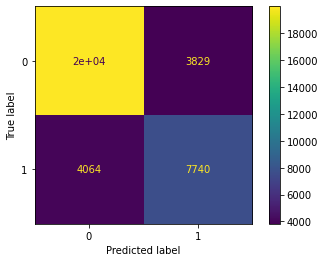

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(classifier_tree , x_valid, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid, y_predict))

[[19992  3829]
 [ 4064  7740]]


In [ ]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_valid, y_predict, target_names=le.classes_))
print(classification_report(y_valid, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     23821
           1       0.67      0.66      0.66     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, y_predict)

0.49510650546919976

In [ ]:
jaccard_score(y_valid, y_predict, average='macro')

0.6060255496684352

In [ ]:
jaccard_score(y_valid, y_predict, average=None)

array([0.71694459, 0.49510651])

##### DecisionTreeClassifier with Smote Tomek  

###### f1-score 

In [ ]:
model_4dt = DecisionTreeClassifier(random_state=1)

In [ ]:
model_4dt.fit(x_ressmtm, y_ressmtm)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions_4dt = model_4dt.predict(x_valid)

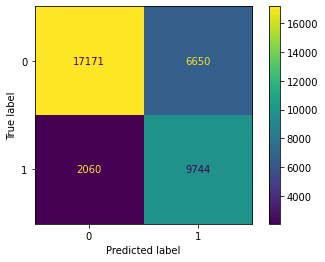

In [ ]:
plot_confusion_matrix(model_4dt , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_4dt))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80     23821
           1       0.59      0.83      0.69     11804

    accuracy                           0.76     35625
   macro avg       0.74      0.77      0.74     35625
weighted avg       0.79      0.76      0.76     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4dt)

0.5280156063726021

In [ ]:
jaccard_score(y_valid, predictions_4dt, average='macro')

0.5957376436097778

In [ ]:
jaccard_score(y_valid, predictions_4dt, average=None)

array([0.66345968, 0.52801561])

##### DecisionTreeClassifier With Tomek

###### f1-score 

In [ ]:
DTTomek = DecisionTreeClassifier(random_state=1)

In [ ]:
DTTomek.fit(X_res_lanel, y_res_lanel)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions_dttomek = DTTomek.predict(x_valid)

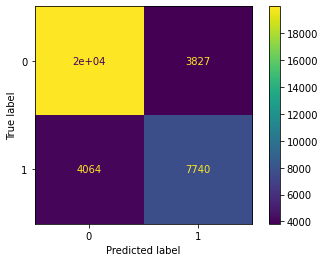

In [ ]:
plot_confusion_matrix(DTTomek , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_dttomek))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     23821
           1       0.67      0.66      0.66     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_dttomek)

0.4951698547757661

In [ ]:
jaccard_score(y_valid, predictions_dttomek, average='macro')

0.6060930858960415

In [ ]:
jaccard_score(y_valid, predictions_dttomek, average=None)

array([0.71701632, 0.49516985])

##### DecisionTreeClassifier With chi feature selection

###### f1-score 

In [ ]:
clf_rf_2 = DecisionTreeClassifier(random_state=55)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)

In [ ]:
dtcm = clf_rf_2.predict(x_test_2)

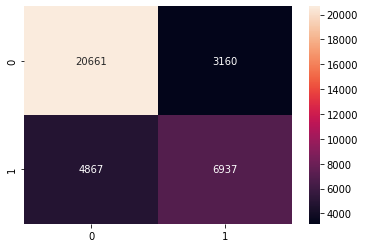

In [ ]:
cm_2 = confusion_matrix(y_valid,dtcm)

sns.heatmap(cm_2,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, dtcm))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     23821
           1       0.69      0.59      0.63     11804

    accuracy                           0.77     35625
   macro avg       0.75      0.73      0.74     35625
weighted avg       0.77      0.77      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, dtcm)

0.4635792568831863

In [ ]:
jaccard_score(y_valid, dtcm, average='macro')

0.5918879273819166

In [ ]:
jaccard_score(y_valid, dtcm, average=None)

array([0.7201966 , 0.46357926])

#### XGBoost

##### XGBoost with normal data

###### f1-score 

In [ ]:
# we assign the output to an object called model.
model = xgb.XGBClassifier(random_state=55)

In [ ]:
# Here, we are using XGBClassifier as a Machine Learning model to fit the data.
model.fit(x_train, y_train)

XGBClassifier(random_state=55)

In [ ]:
print(model)

XGBClassifier(random_state=55)


In [ ]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
expected_y  = y_valid
predicted_y = model.predict(x_valid) 

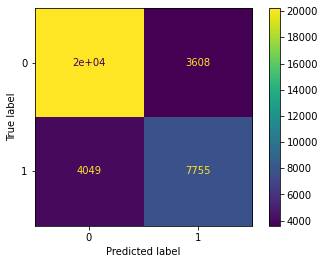

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model , x_valid, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(expected_y, predicted_y))

[[20213  3608]
 [ 4049  7755]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     23821
           1       0.68      0.66      0.67     11804

    accuracy                           0.79     35625
   macro avg       0.76      0.75      0.76     35625
weighted avg       0.78      0.79      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(expected_y, predicted_y)

0.5031793407734233

In [ ]:
jaccard_score(expected_y, predicted_y, average='macro')

0.6142197385603752

In [ ]:
jaccard_score(expected_y, predicted_y, average=None)

array([0.72526014, 0.50317934])

##### XGBoost with Smote Tomek  

###### f1-score 

In [ ]:
model_4xg = xgb.XGBClassifier(random_state=1)

In [ ]:
model_4xg.fit(x_ressmtm, y_ressmtm)

XGBClassifier(random_state=1)

In [ ]:
predictions_4xg = model_4xg.predict(x_valid)

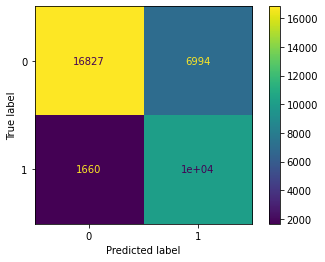

In [ ]:
plot_confusion_matrix(model_4xg , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_4xg))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     23821
           1       0.59      0.86      0.70     11804

    accuracy                           0.76     35625
   macro avg       0.75      0.78      0.75     35625
weighted avg       0.80      0.76      0.76     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4xg)

0.5396318757314608

In [ ]:
jaccard_score(y_valid, predictions_4xg, average='macro')

0.6000031361703495

In [ ]:
jaccard_score(y_valid, predictions_4xg, average=None)

array([0.6603744 , 0.53963188])

##### XGBoost with Tomek

###### f1-score 

In [ ]:
xgtomek = xgb.XGBClassifier(random_state=1)

In [ ]:
xgtomek.fit(X_res_lanel, y_res_lanel)

XGBClassifier(random_state=1)

In [ ]:
predictions_xgtomek = xgtomek.predict(x_valid)

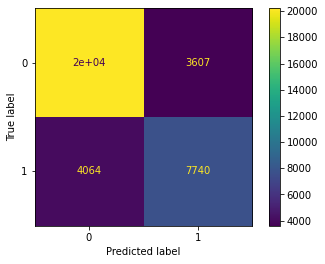

In [ ]:
plot_confusion_matrix(xgtomek , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_xgtomek))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     23821
           1       0.68      0.66      0.67     11804

    accuracy                           0.78     35625
   macro avg       0.76      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_xgtomek)

0.5022386606969048

In [ ]:
jaccard_score(y_valid, predictions_xgtomek, average='macro')

0.6135722620321533

In [ ]:
jaccard_score(y_valid, predictions_xgtomek, average=None)

array([0.72490586, 0.50223866])

##### XGBoost With chi feature selection

###### f1-score 

In [ ]:
clf_rf_1 = xgb.XGBClassifier(random_state=55)      
clr_rf_1 = clf_rf_1.fit(x_train_2,y_train)

In [ ]:
xgf = clf_rf_1.predict(x_test_2)

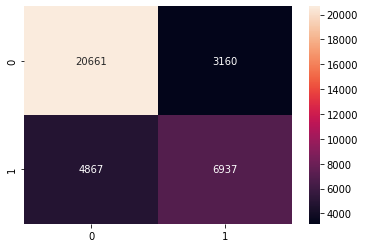

In [ ]:
cm_1 = confusion_matrix(y_valid, xgf)

sns.heatmap(cm_1,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, xgf))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     23821
           1       0.69      0.59      0.63     11804

    accuracy                           0.77     35625
   macro avg       0.75      0.73      0.74     35625
weighted avg       0.77      0.77      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, xgf)

0.4635792568831863

In [ ]:
jaccard_score(y_valid, xgf, average='macro')

0.5918879273819166

In [ ]:
jaccard_score(y_valid, xgf, average=None)

array([0.7201966 , 0.46357926])

#### Gradient XGBoost

##### Gradient XGBoost with normal data

###### f1-score 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradxgboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)

In [ ]:
# Here, we are using XGBClassifier as a Machine Learning model to fit the data.
gradxgboost.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=5, random_state=0)

In [ ]:
print(gradxgboost)

GradientBoostingClassifier(learning_rate=1.0, max_depth=5, random_state=0)


In [ ]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
expected_ygradxg  = y_valid
predicted_ygradxg = gradxgboost.predict(x_valid) 

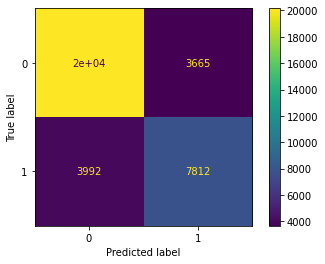

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(gradxgboost , x_valid, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(expected_ygradxg, predicted_ygradxg))

[[20156  3665]
 [ 3992  7812]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(expected_ygradxg, predicted_ygradxg))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     23821
           1       0.68      0.66      0.67     11804

    accuracy                           0.79     35625
   macro avg       0.76      0.75      0.76     35625
weighted avg       0.78      0.79      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(expected_ygradxg, predicted_ygradxg)

0.5050100200400801

In [ ]:
jaccard_score(expected_ygradxg, predicted_ygradxg, average='macro')

0.6148535520687224

In [ ]:
jaccard_score(expected_ygradxg, predicted_ygradxg, average=None)

array([0.72469708, 0.50501002])

##### Gradient XGBoost with Smote Tomek  

###### f1-score 

In [ ]:
model_4xggradxg = xgb.XGBClassifier(random_state=1)

In [ ]:
model_4xggradxg.fit(x_ressmtm, y_ressmtm)

XGBClassifier(random_state=1)

In [ ]:
predictions_4xggradxg = model_4xggradxg.predict(x_valid)

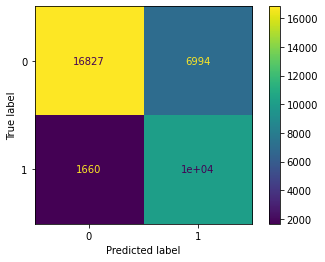

In [ ]:
plot_confusion_matrix(model_4xggradxg , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_4xggradxg))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     23821
           1       0.59      0.86      0.70     11804

    accuracy                           0.76     35625
   macro avg       0.75      0.78      0.75     35625
weighted avg       0.80      0.76      0.76     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4xggradxg)

0.5396318757314608

In [ ]:
jaccard_score(y_valid, predictions_4xggradxg, average='macro')

0.6000031361703495

In [ ]:
jaccard_score(y_valid, predictions_4xggradxg, average=None)

array([0.6603744 , 0.53963188])

##### Gradient XGBoost with Tomek

###### f1-score 

In [ ]:
xgtomekgradxg = xgb.XGBClassifier(random_state=1)

In [ ]:
xgtomekgradxg.fit(X_res_lanel, y_res_lanel)

XGBClassifier(random_state=1)

In [ ]:
predictions_xgtomekgradxg = xgtomekgradxg.predict(x_valid)

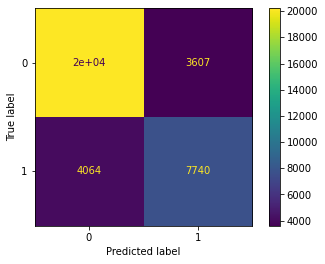

In [ ]:
plot_confusion_matrix(xgtomekgradxg , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_xgtomekgradxg))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     23821
           1       0.68      0.66      0.67     11804

    accuracy                           0.78     35625
   macro avg       0.76      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_xgtomekgradxg)

0.5022386606969048

In [ ]:
jaccard_score(y_valid, predictions_xgtomekgradxg, average='macro')

0.6135722620321533

In [ ]:
jaccard_score(y_valid, predictions_xgtomekgradxg, average=None)

array([0.72490586, 0.50223866])

##### Gradient XGBoost With chi feature selection

###### f1-score 

In [ ]:
clf_rf_1gradxg = xgb.XGBClassifier(random_state=55)      
clr_rf_2gradxg = clf_rf_1gradxg.fit(x_train_2,y_train)

In [ ]:
xgfgradxg = clf_rf_1gradxg.predict(x_test_2)

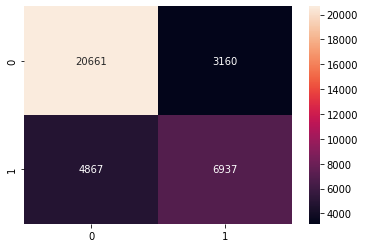

In [ ]:
cm_1 = confusion_matrix(y_valid, xgfgradxg)

sns.heatmap(cm_1,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, xgfgradxg))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     23821
           1       0.69      0.59      0.63     11804

    accuracy                           0.77     35625
   macro avg       0.75      0.73      0.74     35625
weighted avg       0.77      0.77      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, xgfgradxg)

0.4635792568831863

In [ ]:
jaccard_score(y_valid, xgfgradxg, average='macro')

0.5918879273819166

In [ ]:
jaccard_score(y_valid, xgfgradxg, average=None)

array([0.7201966 , 0.46357926])

#### Random Forest

##### Normal Random Forest

###### f1-score 

In [ ]:
# create regressor object
Classifier = RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
# fit the regressor with x and y data
Classifier.fit(x_train, y_train) 

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_pred = Classifier.predict(x_valid)

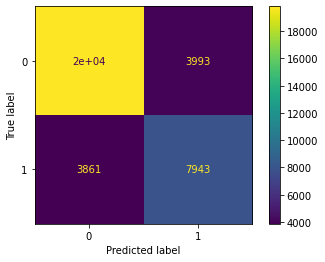

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(Classifier , x_valid, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid,y_pred))

[[19828  3993]
 [ 3861  7943]]


In [ ]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test,y_pred, target_names=le.classes_))
# print(accuracy_score(y_test, y_pred))
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     23821
           1       0.67      0.67      0.67     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, y_pred)

0.5028169905678294

In [ ]:
jaccard_score(y_valid, y_pred, average='macro')

0.6095473580828454

In [ ]:
jaccard_score(y_valid, y_pred, average=None)

array([0.71627773, 0.50281699])

##### Gini

###### f1-score 

In [ ]:
forest = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)

In [ ]:
# Fit the model
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [ ]:
# Measure model performance
y_pred_ = forest.predict(x_valid)

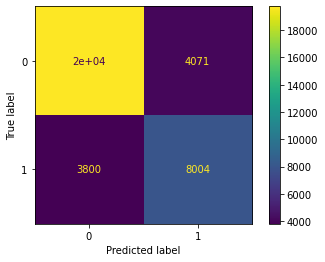

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(forest , x_valid, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid,y_pred_))

[[19750  4071]
 [ 3800  8004]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(y_valid,y_pred_))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     23821
           1       0.66      0.68      0.67     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, y_pred_)

0.5041889763779528

In [ ]:
jaccard_score(y_valid, y_pred_, average='macro')

0.6096123188250866

In [ ]:
jaccard_score(y_valid, y_pred_, average=None)

array([0.71503566, 0.50418898])

#####  Entropy

###### f1-score 

In [ ]:
rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [ ]:
# Fit the model
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [ ]:
# Measure model performance
y_pred_en = rf.predict(x_valid)

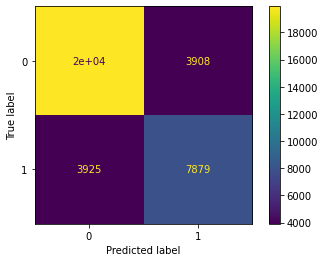

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(rf , x_valid, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid,y_pred_en))

[[19913  3908]
 [ 3925  7879]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(y_valid,y_pred_en))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     23821
           1       0.67      0.67      0.67     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, y_pred_en)

0.501463849287169

In [ ]:
jaccard_score(y_valid, y_pred_en, average='macro')

0.6095764427723238

In [ ]:
jaccard_score(y_valid, y_pred_en, average=None)

array([0.71768904, 0.50146385])

##### Random Forest with Smote Tomek  

###### f1-score 

In [ ]:
model_4rf = RandomForestClassifier(random_state=1)

In [ ]:
model_4rf.fit(x_ressmtm, y_ressmtm)

RandomForestClassifier(random_state=1)

In [ ]:
predictions_4rf = model_4rf.predict(x_valid)

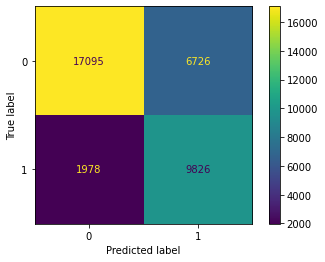

In [ ]:
plot_confusion_matrix(model_4rf , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_4rf))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80     23821
           1       0.59      0.83      0.69     11804

    accuracy                           0.76     35625
   macro avg       0.74      0.78      0.75     35625
weighted avg       0.80      0.76      0.76     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4rf)

0.5302752293577981

In [ ]:
jaccard_score(y_valid, predictions_4rf, average='macro')

0.5964489058142144

In [ ]:
jaccard_score(y_valid, predictions_4rf, average=None)

array([0.66262258, 0.53027523])

##### Random Forest With Tomek

###### f1-score 

In [ ]:
rftomek = RandomForestClassifier(random_state=1)

In [ ]:
rftomek.fit(X_res_lanel, y_res_lanel)

RandomForestClassifier(random_state=1)

In [ ]:
predictions_rftomek = rftomek.predict(x_valid)

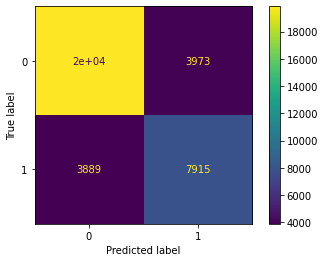

In [ ]:
plot_confusion_matrix(rftomek , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_rftomek))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     23821
           1       0.67      0.67      0.67     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_rftomek)

0.5016796602649426

In [ ]:
jaccard_score(y_valid, predictions_rftomek, average='macro')

0.608977686502013

In [ ]:
jaccard_score(y_valid, predictions_rftomek, average=None)

array([0.71627571, 0.50167966])

##### Random Forest With chi feature selection

###### f1-score 

In [ ]:
clf_rf_3 = RandomForestClassifier(random_state=55)      
clr_rf_3 = clf_rf_3.fit(x_train_2,y_train)

In [ ]:
rff1 = clf_rf_3.predict(x_test_2)

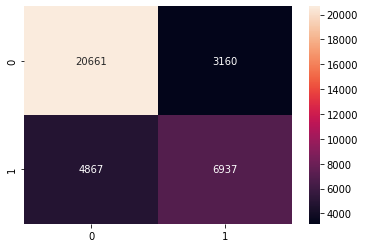

In [ ]:
cm_3 = confusion_matrix(y_valid, rff1)

sns.heatmap(cm_3,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, rff1))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     23821
           1       0.69      0.59      0.63     11804

    accuracy                           0.77     35625
   macro avg       0.75      0.73      0.74     35625
weighted avg       0.77      0.77      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, rff1)

0.4635792568831863

In [ ]:
jaccard_score(y_valid, rff1, average='macro')

0.5918879273819166

In [ ]:
jaccard_score(y_valid, rff1, average=None)

array([0.7201966 , 0.46357926])

#### Logestic Regression

##### Logestic Regression with normal data

###### f1-score 

In [ ]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_ = LogisticRegression(random_state=1)

In [ ]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
# Making Predictions With Our Logistic Regression Model
predictions = model_.predict(x_valid)

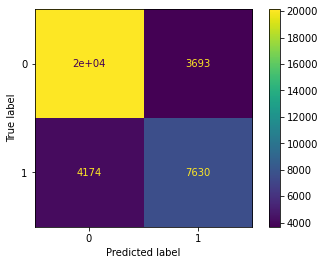

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_, x_valid, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid, predictions))

[[20128  3693]
 [ 4174  7630]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(y_valid, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.828     0.845     0.837     23821
           1      0.674     0.646     0.660     11804

    accuracy                          0.779     35625
   macro avg      0.751     0.746     0.748     35625
weighted avg      0.777     0.779     0.778     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid,  predictions)

0.4923533587145899

In [ ]:
jaccard_score(y_valid,  predictions, average='macro')

0.6056694459227531

In [ ]:
jaccard_score(y_valid,  predictions, average=None)

array([0.71898553, 0.49235336])

######  log loss

In [ ]:
log_loss(y_valid,  predictions)

7.627214226303777

##### Logestic Regression with Smote Tomek  

###### f1-score 

In [ ]:
model_4lr = LogisticRegression(random_state=1)

In [ ]:
model_4lr.fit(x_ressmtm, y_ressmtm)

LogisticRegression(random_state=1)

In [ ]:
predictions_4lr = model_4lr.predict(x_valid)

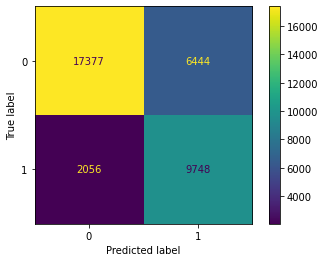

In [ ]:
plot_confusion_matrix(model_4lr , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_4lr))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80     23821
           1       0.60      0.83      0.70     11804

    accuracy                           0.76     35625
   macro avg       0.75      0.78      0.75     35625
weighted avg       0.80      0.76      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4lr)

0.5341955282770715

In [ ]:
jaccard_score(y_valid, predictions_4lr, average='macro')

0.6028592511733544

In [ ]:
jaccard_score(y_valid, predictions_4lr, average=None)

array([0.67152297, 0.53419553])

######  log loss

In [ ]:
log_loss(y_valid, predictions_4lr)

8.240975493686484

##### Logestic Regression With Tomek

###### f1-score 

In [ ]:
lgtomek = LogisticRegression(random_state=1)

In [ ]:
lgtomek.fit(X_res_lanel, y_res_lanel)

LogisticRegression(random_state=1)

In [ ]:
predictions_lgtomek = lgtomek.predict(x_valid)

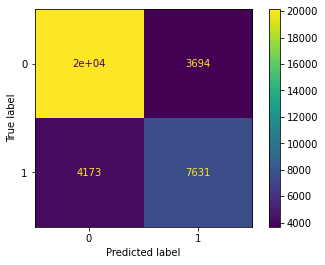

In [ ]:
plot_confusion_matrix(lgtomek , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_lgtomek))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     23821
           1       0.67      0.65      0.66     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_lgtomek)

0.49238611433733387

In [ ]:
jaccard_score(y_valid, predictions_lgtomek, average='macro')

0.6056808045431044

In [ ]:
jaccard_score(y_valid, predictions_lgtomek, average=None)

array([0.71897549, 0.49238611])

######  log loss

In [ ]:
log_loss(y_valid,  predictions_lgtomek)

7.627214248748617

##### Logestic Regression With chi feature selection

###### f1-score 

In [ ]:
clf_rf_4 = LogisticRegression(random_state=55)      
clr_rf_4 = clf_rf_4.fit(x_train_2,y_train)

In [ ]:
lrf1 = clf_rf_4.predict(x_test_2)

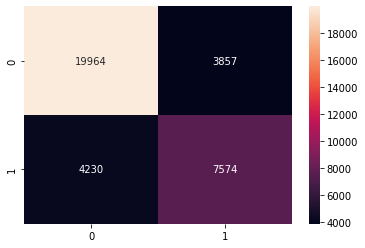

In [ ]:
cm_4 = confusion_matrix(y_valid, lrf1)

sns.heatmap(cm_4,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, lrf1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     23821
           1       0.66      0.64      0.65     11804

    accuracy                           0.77     35625
   macro avg       0.74      0.74      0.74     35625
weighted avg       0.77      0.77      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, lrf1)

0.4836217355213588

In [ ]:
jaccard_score(y_valid, lrf1, average='macro')

0.5976627090497599

In [ ]:
jaccard_score(y_valid, lrf1, average=None)

array([0.71170368, 0.48362174])

######  log loss

In [ ]:
log_loss(y_valid, lrf1)

7.840510000082274

#### Naive Bayes

##### Normal Naive Bayes

###### f1-score 

In [ ]:
# Next, we need to create our model by instantiating an instance of the Naive Bayes object.
model_1 = GaussianNB()

In [ ]:
# To train the model, we need to call the fit method on the Naive Bayes object we just created and pass in our 
# x_train and y_train variables
model_1.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Making Predictions With Our Naive Bayes Model.
predictions_1 = model_1.predict(x_valid)

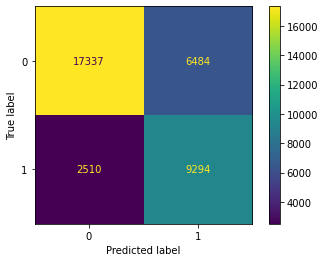

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_1, x_valid, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid, predictions_1))

[[17337  6484]
 [ 2510  9294]]


In [ ]:
# Here we have printed classification_report for the classifier.
print(classification_report(y_valid, predictions_1))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     23821
           1       0.59      0.79      0.67     11804

    accuracy                           0.75     35625
   macro avg       0.73      0.76      0.73     35625
weighted avg       0.78      0.75      0.75     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_1)

0.5082020997375328

In [ ]:
jaccard_score(y_valid, predictions_1, average='macro')

0.5833137649194671

In [ ]:
jaccard_score(y_valid, predictions_1, average=None)

array([0.65842543, 0.5082021 ])

##### Smote Tomek with Naive Bayes

###### f1-score 

In [ ]:
model_4 = GaussianNB()

In [ ]:
model_4.fit(x_ressmtm, y_ressmtm)

GaussianNB()

In [ ]:
predictions_4 = model_4.predict(x_valid)

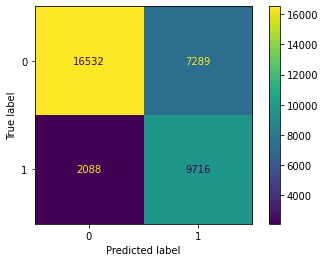

In [ ]:
plot_confusion_matrix(model_4 , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_4))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78     23821
           1       0.57      0.82      0.67     11804

    accuracy                           0.74     35625
   macro avg       0.73      0.76      0.73     35625
weighted avg       0.78      0.74      0.74     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4)

0.5088775991200963

In [ ]:
jaccard_score(y_valid, predictions_4, average='macro')

0.573478515488876

In [ ]:
jaccard_score(y_valid, predictions_4, average=None)

array([0.63807943, 0.5088776 ])

##### Naive Bayes with Tomek

###### f1-score 

In [ ]:
nbtomek = GaussianNB()

In [ ]:
nbtomek.fit(X_res_lanel, y_res_lanel)

GaussianNB()

In [ ]:
predictions_nbtomek = nbtomek.predict(x_valid)

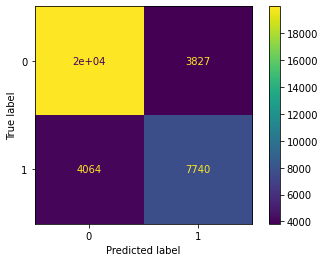

In [ ]:
plot_confusion_matrix(DTTomek , x_valid, y_valid)

In [ ]:
print(classification_report(y_valid, predictions_nbtomek))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     23821
           1       0.59      0.79      0.67     11804

    accuracy                           0.75     35625
   macro avg       0.73      0.76      0.73     35625
weighted avg       0.78      0.75      0.75     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_nbtomek)

0.5081725250095666

In [ ]:
jaccard_score(y_valid, predictions_nbtomek, average='macro')

0.5832290328340779

In [ ]:
jaccard_score(y_valid, predictions_nbtomek, average=None)

array([0.65828554, 0.50817253])

##### Naive Bayes With chi feature selection

###### f1-score 

In [ ]:
clf_rf_6 = GaussianNB()      
clr_rf_6 = clf_rf_6.fit(x_train_2,y_train)

In [ ]:
nbf1 = clf_rf_6.predict(x_test_2)

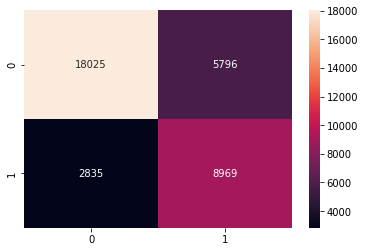

In [ ]:
cm_6 = confusion_matrix(y_valid, nbf1)

sns.heatmap(cm_6,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, nbf1))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81     23821
           1       0.61      0.76      0.68     11804

    accuracy                           0.76     35625
   macro avg       0.74      0.76      0.74     35625
weighted avg       0.78      0.76      0.76     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, nbf1)

0.5096022727272728

In [ ]:
jaccard_score(y_valid, nbf1, average='macro')

0.5929051279602751

In [ ]:
jaccard_score(y_valid, nbf1, average=None)

array([0.67620798, 0.50960227])

###  With Normalization

#### DecisionTreeClassifier

##### DecisionTreeClassifier with normal scaling data

###### f1-score 

In [ ]:
# we assign the output to an object called classifier_tree.
classifier_treee_norm = DecisionTreeClassifier(random_state=5)

In [ ]:
# Here, we are using DecisionTreeClassifier as a Machine Learning model to fit the data.
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_predict_1_norm = classifier_treee_norm.fit(X_train_normlab, y_train).predict(X_test_normlab)

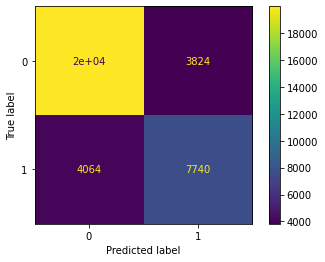

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(classifier_treee_norm , X_test_normlab, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid, y_predict_1_norm))

[[19997  3824]
 [ 4064  7740]]


In [ ]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(y_valid, y_predict_1_norm))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     23821
           1       0.67      0.66      0.66     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, y_predict_1_norm)

0.4952649091374456

In [ ]:
jaccard_score(y_valid, y_predict_1_norm, average='macro')

0.6061944054383659

In [ ]:
jaccard_score(y_valid, y_predict_1, average=None)

array([0.7171239 , 0.49526491])

##### DecisionTreeClassifier with Tomek

###### f1-score 

In [ ]:
model_4dtom_norm = DecisionTreeClassifier(random_state=1)

In [ ]:
model_4dtom_norm.fit(X_train_normal_res, y_res_normal)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions_4dtom_norm = model_4dtom_norm.predict(X_test_normlab)

In [ ]:
print(classification_report(y_valid, predictions_4dtom_norm))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     23821
           1       0.67      0.66      0.66     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4dtom_norm)

0.4951698547757661

In [ ]:
jaccard_score(y_valid, predictions_4dtom_norm, average='macro')

0.6060930858960415

In [ ]:
jaccard_score(y_valid, predictions_4dtom_norm, average=None)

array([0.71701632, 0.49516985])

##### DecisionTreeClassifier with Smote Tomek  

###### f1-score 

In [ ]:
model_4dtc_norm = DecisionTreeClassifier(random_state=1)

In [ ]:
model_4dtc_norm.fit(X_train_normal_resmotom, y_resdsmtk_normal)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions_4dtc_norm = model_4dtc_norm.predict(X_test_normlab)

In [ ]:
print(classification_report(y_valid, predictions_4dtc_norm))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80     23821
           1       0.59      0.83      0.69     11804

    accuracy                           0.76     35625
   macro avg       0.74      0.77      0.74     35625
weighted avg       0.79      0.76      0.76     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4dtc_norm)

0.5280156063726021

In [ ]:
jaccard_score(y_valid, predictions_4dtc_norm, average='macro')

0.5957376436097778

In [ ]:
jaccard_score(y_valid, predictions_4dtc_norm, average=None)

array([0.66345968, 0.52801561])

##### DecisionTreeClassifier With chi feature selection

###### f1-score 

In [ ]:
clf_rf_2_nr = DecisionTreeClassifier(random_state=55)      
clr_rf_2_nr = clf_rf_2_nr.fit(x_train_2_nrscal,y_train)

In [ ]:
dtcm_nr = clf_rf_2_nr.predict(x_test_2_nrscal)

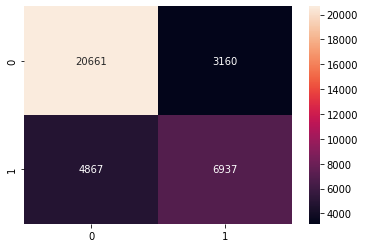

In [ ]:
cm_2_nr = confusion_matrix(y_valid,dtcm_nr)

sns.heatmap(cm_2_nr,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, dtcm_nr))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     23821
           1       0.69      0.59      0.63     11804

    accuracy                           0.77     35625
   macro avg       0.75      0.73      0.74     35625
weighted avg       0.77      0.77      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, dtcm_nr)

0.4635792568831863

In [ ]:
jaccard_score(y_valid, dtcm_nr, average='macro')

0.5918879273819166

In [ ]:
jaccard_score(y_valid, dtcm_nr, average=None)

array([0.7201966 , 0.46357926])

#### Logestic Regression

##### Logestic Regression with normal scaling data

###### f1-score 

In [ ]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_1_norm = LogisticRegression(random_state=11)

In [ ]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_1_norm.fit(X_train_normlab, y_train)

LogisticRegression(random_state=11)

In [ ]:
# Making Predictions With Our Logistic Regression Model
predictionss_norm = model_1_norm.predict(X_test_normlab)

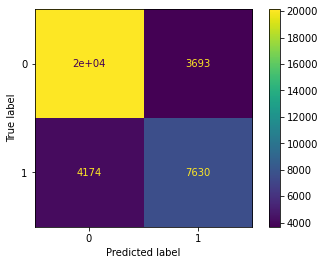

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_1_norm, X_test_normlab, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid, predictionss_norm))

[[20128  3693]
 [ 4174  7630]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(y_valid, predictionss_norm, digits=3))

              precision    recall  f1-score   support

           0      0.828     0.845     0.837     23821
           1      0.674     0.646     0.660     11804

    accuracy                          0.779     35625
   macro avg      0.751     0.746     0.748     35625
weighted avg      0.777     0.779     0.778     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictionss_norm)

0.4923533587145899

In [ ]:
jaccard_score(y_valid, predictionss_norm, average='macro')

0.6056694459227531

In [ ]:
jaccard_score(y_valid, predictionss_norm, average=None)

array([0.71898553, 0.49235336])

######  log loss

In [ ]:
log_loss(y_valid, predictionss_norm)

7.627214226303777

##### Logestic Regression with Tomek

###### f1-score 

In [ ]:
model_lgtom_norm = LogisticRegression(random_state=1)

In [ ]:
model_lgtom_norm.fit(X_train_normal_res, y_res_normal)

LogisticRegression(random_state=1)

In [ ]:
predictions_lgtom_norm = model_lgtom_norm.predict(X_test_normlab)

In [ ]:
print(classification_report(y_valid, predictions_lgtom_norm))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     23821
           1       0.67      0.65      0.66     11804

    accuracy                           0.78     35625
   macro avg       0.75      0.75      0.75     35625
weighted avg       0.78      0.78      0.78     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_lgtom_norm)

0.49238611433733387

In [ ]:
jaccard_score(y_valid, predictions_lgtom_norm, average='macro')

0.6056808045431044

In [ ]:
jaccard_score(y_valid, predictions_lgtom_norm, average=None)

array([0.71897549, 0.49238611])

######  log loss

In [ ]:
log_loss(y_valid, predictions_lgtom_norm)

7.627214248748617

##### Logestic Regression with Smote Tomek  

###### f1-score 

In [ ]:
model_4lrc_norm = LogisticRegression(random_state=1)

In [ ]:
model_4lrc_norm.fit(X_train_normal_resmotom, y_resdsmtk_normal)

LogisticRegression(random_state=1)

In [ ]:
predictions_4lrc_norm = model_4lrc_norm.predict(X_test_normlab)

In [ ]:
print(classification_report(y_valid, predictions_4lrc_norm))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80     23821
           1       0.60      0.83      0.70     11804

    accuracy                           0.76     35625
   macro avg       0.75      0.78      0.75     35625
weighted avg       0.80      0.76      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4lrc_norm)

0.5341955282770715

In [ ]:
jaccard_score(y_valid, predictions_4lrc_norm, average='macro')

0.6028592511733544

In [ ]:
jaccard_score(y_valid, predictions_4lrc_norm, average=None)

array([0.67152297, 0.53419553])

######  log loss

In [ ]:
log_loss(y_valid, predictions_4lrc_norm)

8.240975493686484

##### Logestic Regression With chi feature selection

###### f1-score 

In [ ]:
clf_rf_4_nr = LogisticRegression(random_state=55)      
clr_rf_4_nr = clf_rf_4_nr.fit(x_train_2_nrscal,y_train)

In [ ]:
lrf1_nr = clf_rf_4_nr.predict(x_test_2_nrscal)

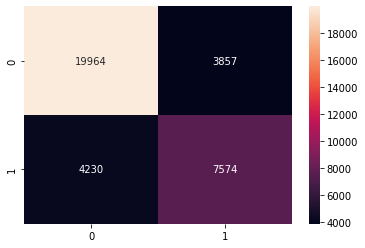

In [ ]:
cm_4_nr = confusion_matrix(y_valid, lrf1_st)

sns.heatmap(cm_4_nr,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, lrf1_nr))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     23821
           1       0.66      0.64      0.65     11804

    accuracy                           0.77     35625
   macro avg       0.74      0.74      0.74     35625
weighted avg       0.77      0.77      0.77     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, lrf1_nr)

0.4836217355213588

In [ ]:
jaccard_score(y_valid, lrf1_nr, average='macro')

0.5976627090497599

In [ ]:
jaccard_score(y_valid, lrf1_nr, average=None)

array([0.71170368, 0.48362174])

######  log loss

In [ ]:
log_loss(y_valid, lrf1_nr)

7.840510000082274

#### Naive Bayes

##### Naive Bayes with normal scaling data

###### f1-score 

In [ ]:
# Next, we need to create our model by instantiating an instance of the Naive Bayes object.
model_1_ = GaussianNB()

In [ ]:
# To train the model, we need to call the fit method on the Naive Bayes object we just created and pass in our 
# x_train and y_train variables
model_1_.fit(X_train_normlab, y_train)

GaussianNB()

In [ ]:
# Making Predictions With Our Naive Bayes Model.
predictions_1__norm = model_1_.predict(X_test_normlab)

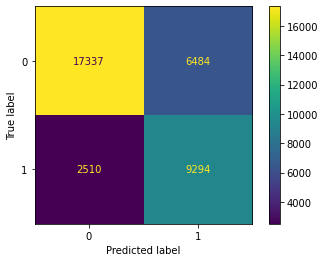

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_1_, X_test_normlab, y_valid)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_valid, predictions_1__norm))

[[17337  6484]
 [ 2510  9294]]


In [ ]:
# Here we have printed classification_report for the classifier.
print(classification_report(y_valid, predictions_1__norm))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     23821
           1       0.59      0.79      0.67     11804

    accuracy                           0.75     35625
   macro avg       0.73      0.76      0.73     35625
weighted avg       0.78      0.75      0.75     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_1__norm)

0.5082020997375328

In [ ]:
jaccard_score(y_valid, predictions_1__norm, average='macro')

0.5833137649194671

In [ ]:
jaccard_score(y_valid, predictions_1__norm, average=None)

array([0.65842543, 0.5082021 ])

##### Naive Bayes with Tomek

###### f1-score 

In [ ]:
model_nbtom = GaussianNB()

In [ ]:
model_nbtom.fit(X_train_normal_res, y_res_normal)

GaussianNB()

In [ ]:
predictions_nbtom_norm = model_nbtom.predict(X_test_normlab)

In [ ]:
print(classification_report(y_valid, predictions_nbtom_norm))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     23821
           1       0.59      0.79      0.67     11804

    accuracy                           0.75     35625
   macro avg       0.73      0.76      0.73     35625
weighted avg       0.78      0.75      0.75     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_nbtom_norm)

0.5081725250095666

In [ ]:
jaccard_score(y_valid, predictions_nbtom_norm, average='macro')

0.5832290328340779

In [ ]:
jaccard_score(y_valid, predictions_nbtom_norm, average=None)

array([0.65828554, 0.50817253])

##### Smote Tomek with Naive Bayes

###### f1-score 

In [ ]:
model_4__norm = GaussianNB()

In [ ]:
model_4__norm.fit(X_train_normal_resmotom, y_resdsmtk_normal)

GaussianNB()

In [ ]:
predictions_4__norm = model_4__norm.predict(X_test_normlab)

In [ ]:
print(classification_report(y_valid, predictions_4__norm))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78     23821
           1       0.57      0.82      0.67     11804

    accuracy                           0.74     35625
   macro avg       0.73      0.76      0.73     35625
weighted avg       0.78      0.74      0.74     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, predictions_4__norm)

0.5088775991200963

In [ ]:
jaccard_score(y_valid, predictions_4__norm, average='macro')

0.573478515488876

In [ ]:
jaccard_score(y_valid, predictions_4__norm, average=None)

array([0.63807943, 0.5088776 ])

##### Naive Bayes With chi feature selection

###### f1-score 

In [ ]:
clf_rf_6_nr = GaussianNB()      
clr_rf_6_nr = clf_rf_6_nr.fit(x_train_2_nrscal,y_train)

In [ ]:
nbf1_nr = clf_rf_6_st.predict(x_test_2_nrscal)

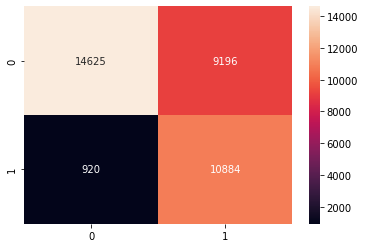

In [ ]:
cm_6_nr = confusion_matrix(y_valid, nbf1_nr)

sns.heatmap(cm_6_nr,annot=True,fmt="d")

In [ ]:
print(classification_report(y_valid, nbf1_nr))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74     23821
           1       0.54      0.92      0.68     11804

    accuracy                           0.72     35625
   macro avg       0.74      0.77      0.71     35625
weighted avg       0.81      0.72      0.72     35625



###### jaccard_score

In [ ]:
jaccard_score(y_valid, nbf1_nr)

0.5182857142857142

In [ ]:
jaccard_score(y_valid, nbf1_nr, average='macro')

0.554704879696513

In [ ]:
jaccard_score(y_valid, nbf1_nr, average=None)

array([0.59112405, 0.51828571])

## Model Testing 

### Without scaling

#### DecisionTreeClassifier

In [ ]:
# Here, we are using DecisionTreeClassifier as a Machine Learning model to fit the data.
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_predict_test = classifier_tree.fit(drx_train, dry_train).predict(drx_test)

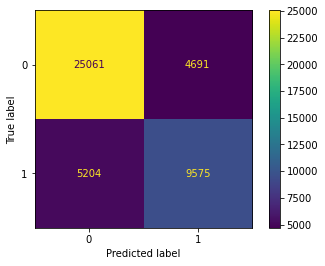

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(classifier_tree , drx_test, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(dry_test, y_predict_test))

[[25061  4691]
 [ 5204  9575]]


In [ ]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(dry_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.65      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



#### XGBoost



##### XGBoost Normal data

In [ ]:
# Here, we are using XGBClassifier as a Machine Learning model to fit the data.
model.fit(drx_train, dry_train)

XGBClassifier(random_state=55)

In [ ]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
expected_y_test  = dry_test
predicted_y_test = model.predict(drx_test)

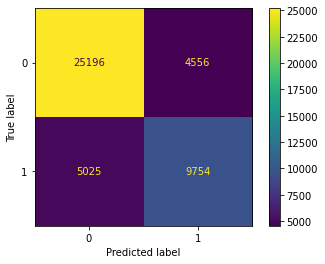

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model , drx_test, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(expected_y_test, predicted_y_test))

[[25196  4556]
 [ 5025  9754]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(expected_y_test, predicted_y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     29752
           1       0.68      0.66      0.67     14779

    accuracy                           0.78     44531
   macro avg       0.76      0.75      0.76     44531
weighted avg       0.78      0.78      0.78     44531



##### XGBoost with Smote Tomek  

In [ ]:
predictions_4xg_test = model_4xg.predict(drx_test)

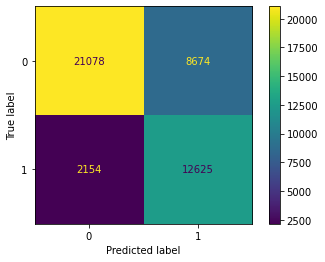

In [ ]:
plot_confusion_matrix(model_4xg , drx_test, dry_test)

In [ ]:
print(classification_report(dry_test, predictions_4xg_test))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     29752
           1       0.59      0.85      0.70     14779

    accuracy                           0.76     44531
   macro avg       0.75      0.78      0.75     44531
weighted avg       0.80      0.76      0.76     44531



##### XGBoost With chi feature selection

In [ ]:
xgf_test = clf_rf_1.predict(X_test)

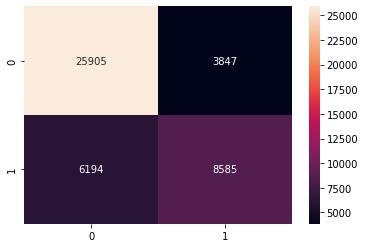

In [ ]:
cm_1_tast = confusion_matrix(dry_test, xgf_test)

sns.heatmap(cm_1_tast,annot=True,fmt="d")

In [ ]:
print(classification_report(dry_test, xgf_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     29752
           1       0.69      0.58      0.63     14779

    accuracy                           0.77     44531
   macro avg       0.75      0.73      0.73     44531
weighted avg       0.77      0.77      0.77     44531



##### XGBoost with Tomek

In [ ]:
predictions_xgtomek_test = xgtomek.predict(drx_test)

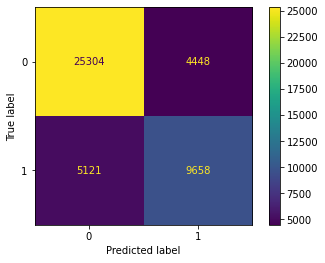

In [ ]:
plot_confusion_matrix(xgtomek , drx_test, dry_test)

In [ ]:
print(classification_report(dry_test, predictions_xgtomek_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     29752
           1       0.68      0.65      0.67     14779

    accuracy                           0.79     44531
   macro avg       0.76      0.75      0.75     44531
weighted avg       0.78      0.79      0.78     44531



#### Gradient XGBoost

##### Gradient XGBoost with normal data

In [ ]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
expected_ygradxg_test  = dry_test
predicted_ygradxg_test = gradxgboost.predict(drx_test) 

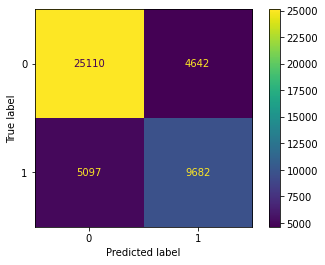

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(gradxgboost , drx_test, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(expected_ygradxg_test, predicted_ygradxg_test))

[[25110  4642]
 [ 5097  9682]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(expected_ygradxg_test, predicted_ygradxg_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.68      0.66      0.67     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



##### Gradient XGBoost with Tomek

In [ ]:
predictions_xgtomekgradxg = xgtomekgradxg.predict(drx_test)

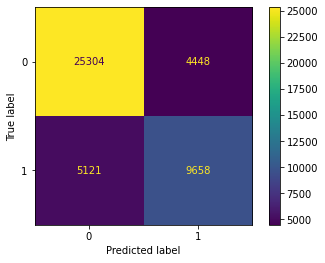

In [ ]:
plot_confusion_matrix(xgtomekgradxg , drx_test, dry_test)

In [ ]:
print(classification_report(dry_test, predictions_xgtomekgradxg))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     29752
           1       0.68      0.65      0.67     14779

    accuracy                           0.79     44531
   macro avg       0.76      0.75      0.75     44531
weighted avg       0.78      0.79      0.78     44531



##### Gradient XGBoost With chi feature selection

In [ ]:
clf_rf_1gradxg.fit(ddrx_train ,dry_train)

XGBClassifier(random_state=55)

In [ ]:
xgfgradxg_test = clf_rf_1gradxg.predict(X_test)

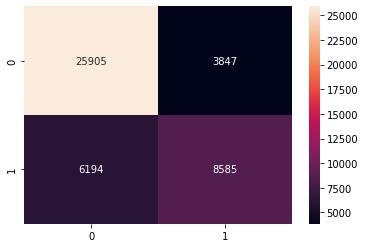

In [ ]:
cm_1p_test = confusion_matrix(dry_test, xgfgradxg_test)

sns.heatmap(cm_1p_test,annot=True,fmt="d")

In [ ]:
print(classification_report(dry_test, xgfgradxg_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     29752
           1       0.69      0.58      0.63     14779

    accuracy                           0.77     44531
   macro avg       0.75      0.73      0.73     44531
weighted avg       0.77      0.77      0.77     44531



#### Random Forest

##### Random Forest Normal Data

In [ ]:
# fit the regressor with x and y data
Classifier.fit(drx_train, dry_train) 

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_pred_test = Classifier.predict(drx_test)

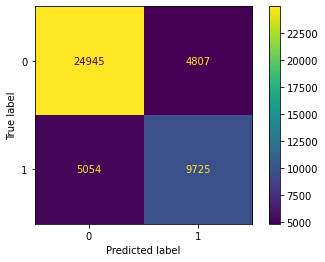

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(Classifier , drx_test, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(dry_test,y_pred_test))

[[24945  4807]
 [ 5054  9725]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(dry_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     29752
           1       0.67      0.66      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



##### Gini

In [ ]:
# Fit the model
forest.fit(drx_train, dry_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

In [ ]:
# Measure model performance
y_pred_dtest = forest.predict(drx_test)

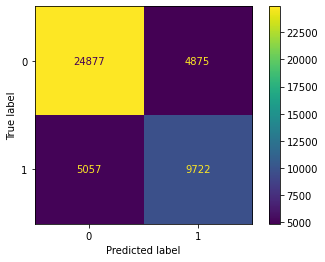

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(forest , drx_test, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(dry_test,y_pred_dtest))

[[24877  4875]
 [ 5057  9722]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(dry_test,y_pred_dtest))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     29752
           1       0.67      0.66      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



#####  Entropy

In [ ]:
# Fit the model
rf.fit(drx_train, dry_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [ ]:
# Measure model performance
y_pred_entest = rf.predict(drx_test)

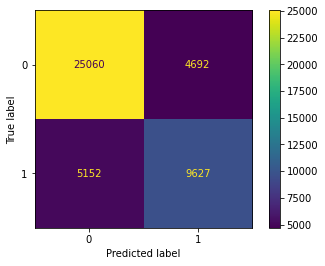

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(rf , drx_test, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(dry_test,y_pred_entest))

[[25060  4692]
 [ 5152  9627]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(dry_test,y_pred_entest))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.65      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



##### Random Forest With Tomek

In [ ]:
rftomek.fit(drx_train, dry_train)

RandomForestClassifier(random_state=1)

In [ ]:
predictions_rftomektest = rftomek.predict(drx_test)

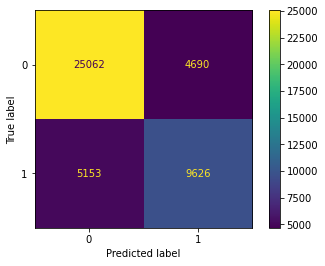

In [ ]:
plot_confusion_matrix(rftomek , drx_test, dry_test)

In [ ]:
print(classification_report(dry_test, predictions_rftomektest))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.65      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



##### Random Forest With chi feature selection

In [ ]:
clf_rf_3.fit(ddrx_train ,dry_train)

RandomForestClassifier(random_state=55)

In [ ]:
rff1_test = clf_rf_3.predict(X_test)

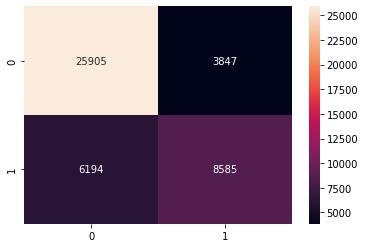

In [ ]:
cm_3_test = confusion_matrix(dry_test, rff1_test)

sns.heatmap(cm_3_test,annot=True,fmt="d")

In [ ]:
print(classification_report(dry_test, rff1_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     29752
           1       0.69      0.58      0.63     14779

    accuracy                           0.77     44531
   macro avg       0.75      0.73      0.73     44531
weighted avg       0.77      0.77      0.77     44531



#### Logestic Regression 

##### Logestic Regression Normal Data

In [ ]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_.fit(drx_train, dry_train)

LogisticRegression(random_state=1)

In [ ]:
# Making Predictions With Our Logistic Regression Model
predictionstest = model_.predict(drx_test)

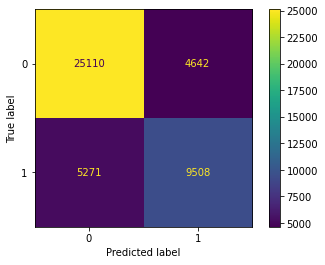

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_, drx_test, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(dry_test, predictionstest))

[[25110  4642]
 [ 5271  9508]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(dry_test, predictionstest))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.64      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.74      0.75     44531
weighted avg       0.78      0.78      0.78     44531



##### Logestic Regression With Tomek

In [ ]:
lgtomek.fit(drx_train, dry_train)

LogisticRegression(random_state=1)

In [ ]:
predictions_lgtomek_test = lgtomek.predict(drx_test)

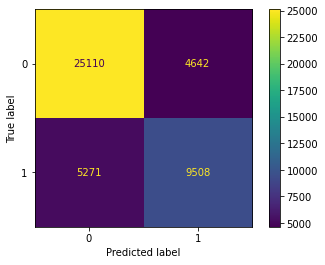

In [ ]:
plot_confusion_matrix(lgtomek , drx_test, dry_test)

In [ ]:
print(classification_report(dry_test, predictions_lgtomek_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.64      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.74      0.75     44531
weighted avg       0.78      0.78      0.78     44531



##### Logestic Regression With chi feature selection

In [ ]:
clf_rf_4.fit(ddrx_train ,dry_train)

LogisticRegression(random_state=55)

In [ ]:
lrf1_test = clf_rf_4.predict(X_test)

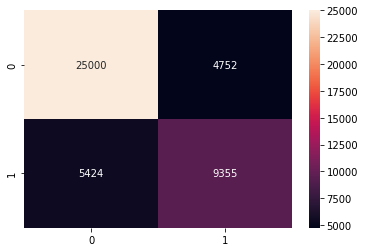

In [ ]:
cm_4_test = confusion_matrix(dry_test, lrf1_test)

sns.heatmap(cm_4_test,annot=True,fmt="d")

In [ ]:
print(classification_report(dry_test, lrf1_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     29752
           1       0.66      0.63      0.65     14779

    accuracy                           0.77     44531
   macro avg       0.74      0.74      0.74     44531
weighted avg       0.77      0.77      0.77     44531



######  log loss

In [ ]:
log_loss(y_valid, lrf1)

7.840510000082274

###  With Scaling Normalization

#### Define Scale

In [ ]:
normal_test = MinMaxScaler()

In [ ]:
drxx_ttrain = normal_test.fit_transform(drx_train)

In [ ]:
drxx_ttest = normal_test.transform(drx_test)

In [ ]:
drall_ttrain = normal_test.fit_transform(all_train)

In [ ]:
drRT_ttest = normal_test.transform(RT_test)

#### DecisionTreeClassifier

##### DecisionTreeClassifier normal scaling data

In [ ]:
# Here, we are using DecisionTreeClassifier as a Machine Learning model to fit the data.
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
y_predict_1_test = classifier_treee_norm.fit(drxx_ttrain, dry_train).predict(drxx_ttest)

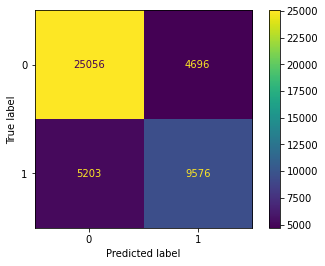

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(classifier_treee_norm , drxx_ttest, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(dry_test, y_predict_1_test))

[[25056  4696]
 [ 5203  9576]]


In [ ]:
# Here we have printed classification report for the classifier.
# print(classification_report(y_test, y_predict, target_names=le.classes_))
print(classification_report(dry_test, y_predict_1_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.65      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



##### DecisionTreeClassifier with Tomek

In [ ]:
model_4dtom_norm.fit(drxx_ttrain, dry_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions_4dtom_norm_test = model_4dtom_norm.predict(drxx_ttest)

In [ ]:
print(classification_report(dry_test, predictions_4dtom_norm_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.65      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



#### Logestic Regression

##### Logestic Regression normal scaling data

In [ ]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_1_norm.fit(drxx_ttrain, dry_train)

LogisticRegression(random_state=11)

In [ ]:
# Making Predictions With Our Logistic Regression Model
predictions_norm_test= model_1_norm.predict(drxx_ttest)

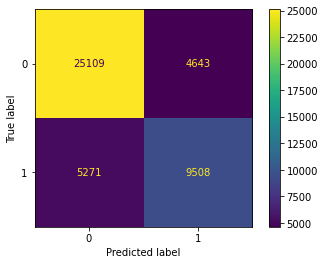

In [ ]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_1_norm, drxx_ttest, dry_test)

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(dry_test, predictions_norm_test))

[[25109  4643]
 [ 5271  9508]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(dry_test, predictions_norm_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.64      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.74      0.75     44531
weighted avg       0.78      0.78      0.78     44531



##### Logestic Regression with Tomek

In [ ]:
model_lgtom_norm.fit(drxx_ttrain, dry_train)

LogisticRegression(random_state=1)

In [ ]:
predictions_lgtom_norm_test = model_lgtom_norm.predict(drxx_ttest)

In [ ]:
print(classification_report(dry_test, predictions_lgtom_norm_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     29752
           1       0.67      0.64      0.66     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.74      0.75     44531
weighted avg       0.78      0.78      0.78     44531

